<a href="https://colab.research.google.com/github/ulfasyabania/Membuat-Model-Sistem-Rekomendasi/blob/main/Membuat_Model_Sistem_Rekomendasi_ulfasyabania.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Meningkatkan Aksesibilitas Ruang Terbuka di Kota Urban: Pendekatan Content-Based Filtering dan Cluster Analysis**

## **Import Library yang Diperlukan**

In [1]:
# Import library untuk manipulasi data dan visualisasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Mengatur style visualisasi agar lebih menarik
sns.set(style="whitegrid")


## **Mengambil Data dari URL**

In [2]:
# URL dataset
url = "https://raw.githubusercontent.com/ulfasyabania/Membuat-Model-Sistem-Rekomendasi/refs/heads/main/SDG_11-7-1.csv"

# Membaca dataset dari URL
df = pd.read_csv(url)


## **Melihat Sekilas Isi Data (Head of Data)**

In [3]:
# Menampilkan 5 baris pertama dari dataset
df.head()


,SDG Goal,SDG Target,SDG Indicator,Country or Territory Code,Country or Territory Name,SDG Region,SDG Sub-Region,City Code,City Name,Average share of the built-up area of cities that is open space for public use for all (%) [a],Average share of urban population with convenient access to open public spaces (%) [b],Data Units,Data Reference Year,Data Source,FootNote
0,11,11.7,11.7.1,4,Afghanistan,Central Asia and Southern Asia,Southern Asia,AF_CHARIKAR,Chārīkār,17.945026,82.053413,PERCENT,2020,UN-Habitat Urban Indicators Database,[a] Calculated as the proportion of urban area...
1,11,11.7,11.7.1,4,Afghanistan,Central Asia and Southern Asia,Southern Asia,AF_FARAH,Farāh,12.133543,62.464343,PERCENT,2020,UN-Habitat Urban Indicators Database,[a] Calculated as the proportion of urban area...
2,11,11.7,11.7.1,4,Afghanistan,Central Asia and Southern Asia,Southern Asia,AF_HERAT,Herat,17.196642,55.557153,PERCENT,2020,UN-Habitat Urban Indicators Database,[a] Calculated as the proportion of urban area...
3,11,11.7,11.7.1,4,Afghanistan,Central Asia and Southern Asia,Southern Asia,AF_JALALABAD,Jalālābād,15.652377,59.009593,PERCENT,2020,UN-Habitat Urban Indicators Database,[a] Calculated as the proportion of urban area...
4,11,11.7,11.7.1,4,Afghanistan,Central Asia and Southern Asia,Southern Asia,AF_KABUL,Kabul,19.895799,13.043318,PERCENT,2020,UN-Habitat Urban Indicators Database,[a] Calculated as the proportion of urban area...


## **Insights:**

1. **Konteks Dataset dan Konsistensi Informasi:**  
   - Dataset ini khusus untuk indikator SDG 11.7.1 yang mengukur dua hal utama:  
     a. Persentase area terbangun kota yang dialokasikan sebagai ruang terbuka publik.  
     b. Persentase penduduk perkotaan yang memiliki akses mudah (dalam jarak berjalan kaki 400 meter) ke ruang terbuka publik.  
   - Seluruh baris menunjukkan data dengan unit persentase, tahun referensi 2020, dan sumber data dari UN-Habitat Urban Indicators Database. Informasi kontekstual ini memberikan keyakinan bahwa pengukuran dilakukan secara konsisten di seluruh entri.

---

2. **Karakteristik Data Berbasis Geografis:**  
   - Lima baris pertama seluruhnya berasal dari Afghanistan, yang merupakan bagian dari wilayah “Central Asia and Southern Asia” dengan sub-wilayah “Southern Asia.”  
   - Setiap baris mengacu pada kota berbeda di Afghanistan, yang ditandai dengan kolom `City Code` dan `City Name`. Hal ini menunjukkan bahwa dataset ini didesain untuk analisis perbandingan antar kota dalam satu negara atau antar negara secara global jika dataset tersebut lebih lengkap.

---
  
3. **Variabilitas antara Proporsi Area Terbuka dan Aksesibilitas:**  
   - Terdapat perbedaan mencolok antara nilai “Average share of the built-up area of cities that is open space for public use” dan “Average share of urban population with convenient access to open public spaces.”  
   - Sebagai contoh, pada baris pertama (Chārīkār) proporsi ruang terbuka publik adalah sekitar 17.95% dengan aksesibilitas sebesar 82.05%, menunjukkan bahwa meskipun persentase area yang disediakan untuk ruang terbuka publik relatif moderat, distribusi atau lokasi ruang tersebut memberikan akses yang sangat baik ke sebagian besar penduduk.  
   - Kontrasnya, baris kelima (Kabul) menunjukkan persentase ruang terbuka publik sebesar 19.90% namun aksesibilitas penduduk hanya 13.04%. Hal ini dapat mengindikasikan bahwa meskipun secara nominal terdapat area terbuka yang lebih besar, distribusi atau konektivitas ruang tersebut kurang optimal sehingga hanya sebagian kecil penduduk yang dapat mengaksesnya dengan mudah.

---

4. **Potensi Tantangan Urban dan Peluang Intervensi:**  
   - Perbedaan mencolok di antara nilai untuk masing-masing kota mengindikasikan bahwa tidak hanya ukuran ruang terbuka yang penting, tetapi juga bagaimana ruang tersebut terdistribusi dan terintegrasi dalam jaringan kota.  
   - Perbedaan ekstrem seperti yang terlihat pada Kabul memunculkan pertanyaan tentang faktor-faktor yang mungkin menghambat akses, misalnya perencanaan tata ruang yang tidak merata, infrastruktur transportasi yang kurang mendukung, atau faktor geografi yang unik pada kota tersebut.  
   - Insight semacam ini sangat relevan untuk membangun model sistem rekomendasi, di mana analisis lebih lanjut dapat mengarahkan intervensi atau perencanaan ulang untuk meningkatkan aksesibilitas ruang publik di kota-kota yang mengalami disparitas, sekaligus membantu mengidentifikasi faktor kunci keberhasilan perencanaan kota.

---

5. **Langkah Lanjut dalam Analisis:**
  - Mengidentifikasi dan memvisualisasikan distribusi nilai
    masing-masing kolom dapat membantu memberikan gambaran lebih mendetail tentang pola pengalokasian ruang terbuka dan aksesibilitas penduduk.
  - Analisis korelasi antara kedua indikator dapat mengungkap
    kaitan atau potensi ketidaksesuaian antara luas area yang disediakan dan distribusi akses ke ruang publik.
  - Mendeteksi outlier (seperti perbedaan ekstrem yang terlihat
    pada Kabul) akan memungkinkan pendalaman penyebab perbedaan tersebut dan bagaimana rekomendasi kebijakan bisa diadaptasi untuk masing-masing konteks kota.

---

Keseluruhan, output dari lima baris pertama ini memberikan gambaran awal yang kaya mengenai bagaimana data dikumpulkan dan menyusun landasan untuk analisis lebih mendalam. Hal ini sangat tepat sebagai titik tolak dalam Proyek Akhir untuk mengembangkan model sistem rekomendasi guna mengoptimalkan perencanaan ruang terbuka publik di tingkat kota, yang nantinya dapat memberikan rekomendasi kebijakan atau intervensi urban secara lebih spesifik dan tepat sasaran.

---

## **Mengecek Informasi Data**

In [4]:
# Menampilkan informasi dasar dataset (jumlah baris, kolom, dan tipe data)
df.info()

# Melihat statistik deskriptif untuk kolom numerik
df.describe()

# Mengecek apakah ada nilai yang hilang (missing values)
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1711 entries, 0 to 1710
Data columns (total 15 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   SDG Goal                                                                                        1711 non-null   int64  
 1   SDG Target                                                                                      1711 non-null   float64
 2   SDG Indicator                                                                                   1711 non-null   object 
 3   Country or Territory Code                                                                       1711 non-null   int64  
 4   Country or Territory Name                                                                       1711 non-null   object 
 5   SDG Region   

,0
SDG Goal,0
SDG Target,0
SDG Indicator,0
Country or Territory Code,0
Country or Territory Name,0
SDG Region,14
SDG Sub-Region,14
City Code,14
City Name,14
Average share of the built-up area of cities that is open space for public use for all (%) [a],199


## **Insights:**

### 1. Ukuran dan Struktur Dataset  
- **Jumlah Baris dan Kolom:**  
  Dataset memiliki 1711 entri (baris) dengan 15 kolom. Ukuran ini menunjukan bahwa dataset cukup besar untuk analisis komparatif antar kota maupun negara, namun juga perlu diperhatikan dalam hal komputasi untuk model rekomendasi nanti.

- **Tipe Data:**  
  - Terdapat kolom bertipe numerik seperti integer (misalnya, *SDG Goal*, *Country or Territory Code*, *Data Reference Year*) dan float (misalnya, *SDG Target* serta dua kolom indikator [a] dan [b]).  
  - Sebagian besar kolom bersifat *object* (teks), terutama yang berisi informasi geografis dan metadata (seperti *Country or Territory Name*, *SDG Region*, *City Code*, *City Name*, *Data Source*, dan *FootNote*).

---

### 2. Kualitas Data dan Missing Values  
- **Kolom dengan Data Lengkap:**  
  Kolom-kolom seperti *SDG Goal*, *SDG Target*, *SDG Indicator*, *Country or Territory Code*, *Country or Territory Name*, *Data Units*, *Data Reference Year*, *Data Source*, dan *FootNote* memiliki 1711 entri yang lengkap. Ini memastikan bahwa aspek dasar metadata dan pengidentifikasi selalu ada di setiap baris.

- **Kolom Geografis yang Hampir Lengkap:**  
  - *SDG Region*, *SDG Sub-Region*, *City Code*, dan *City Name* masing-masing memiliki 14 missing values.  
  - Missing values ini relatif kecil dibandingkan total 1711 baris (sekitar 0,8% dari dataset), namun perlu diperhatikan untuk analisis yang memanfaatkan informasi geografis.

- **Kolom Indikator Kunci:**  
  - *Average share of the built-up area of cities that is open space for public use for all (%) [a]* memiliki 199 missing values (sekitar 11,6% dari total data).  
  - *Average share of urban population with convenient access to open public spaces (%) [b]* memiliki 149 missing values (sekitar 8,7%).  
  Karena keduanya merupakan indikator utama untuk perancangan ruang publik, tingkat missing value yang cukup signifikan di kolom ini perlu ditangani, baik melalui imputasi, penghapusan baris, atau metode lain, agar analisis dan model dapat memperoleh hasil yang andal.

---

### 3. Statistik Deskriptif untuk Kolom Numerik  
- **Rentang Nilai dan Distribusi:**  
  Dengan fungsi `df.describe()`, kita dapat memperoleh informasi seperti nilai minimum, maksimum, rata-rata, dan standar deviasi untuk kolom-kolom numerik. Meskipun output lengkap dari `describe()` tidak ditampilkan di sini, kita dapat menyimpulkan:
  - Nilai-nilai indikator harus berada di rentang 0-100 (dengan asumsi satuan adalah persen).
  - Perbedaan nilai antar baris dapat memberikan informasi mengenai sebaran dan variasi dalam penyediaan ruang terbuka publik dan aksesibilitasnya di berbagai kota.

- **Implikasi Statistik Deskriptif:**  
  Informasi seperti rata-rata dan distribusi nilai akan membantu mengidentifikasi apakah ada outlier atau pola khusus. Jika terdapat nilai maksimum yang jauh lebih tinggi/lunak dibandingkan rata-rata, mungkin hal itu menunjukkan adanya kota dengan kinerja luar biasa (baik positif atau negatif) dalam menyediakan ruang terbuka.

---

### 4. Implikasi untuk Model Sistem Rekomendasi  
- **Pentingnya Penanganan Missing Values:**  
  Sebelum melangkah ke tahap modeling (seperti content-based filtering, collaborative filtering, atau hybrid approaches), penanganan missing values pada kolom indikator utama harus diprioritaskan.  
- **Analisis Lanjutan:**  
  Informasi geografis dan statistik deskriptif yang telah diperoleh menjadi dasar untuk:
  - Melakukan segmentasi atau clustering kota berdasarkan kinerja ruang publik.
  - Mengembangkan fitur tambahan atau variabel turunan (rasio antara luas ruang terbuka dan aksesibilitas) yang nantinya dapat meningkatkan akurasi model rekomendasi.
- **Strategi Imbangan Data:**  
  Karena ada perbedaan signifikan antara informasi geografis dan indikator kunci (yang memiliki jumlah missing cukup tinggi), strategi imputation atau analisis missingness (apakah missing-nya acak atau mengikuti pola tertentu) akan penting untuk memastikan hasil yang robust.

---

Secara keseluruhan, output dari `df.info()`, `df.describe()`, dan `df.isnull().sum()` memberikan gambaran komprehensif mengenai struktur, kualitas, dan tantangan data. Ini menjadi fondasi awal untuk langkah-langkah pra-pemrosesan data,mseperti membersihkan data dan menangani missing values, sebelum mengembangkan model sistem rekomendasi yang lebih lanjut.

---

## **Penanganan Missing Values**

Karena ada missing values di kolom-kolom kunci (khususnya pada indikator ruang terbuka dan aksesibilitas), penting untuk menentukan strategi pembersihan. Beberapa pendekatan yang bisa di lakukan antara lain:

- **Hapus Baris dengan Nilai Kritis yang Hilang:**  
  Jika jumlah missing values relatif kecil, bisa menghapus baris tersebut, terutama untuk analisis awal.  
- **Imputasi Missing Values:**  
  Bisa mengisi missing values dengan nilai mean, median, atau teknik imputasi lainnya jika ingin menjaga sebanyak mungkin data.

In [5]:
# Menghapus baris di mana salah satu indikator utama memiliki missing values
required_columns = ['Average share of the built-up area of cities that is open space for public use for all (%) [a]',
                    'Average share of urban population with convenient access to open public spaces (%) [b]']
df_clean = df.dropna(subset=required_columns)

# Mengecek jumlah data setelah pembersihan
print("Jumlah baris setelah pembersihan:", df_clean.shape[0])


Jumlah baris setelah pembersihan: 1363


## **Insights:**

1. **Pengurangan Data:**  
   - Dataset awal memiliki 1711 baris. Setelah menghapus baris yang memiliki missing values di salah satu atau kedua kolom indikator utama, dataset berkurang menjadi 1363 baris.  
   - Artinya, sebanyak 1711 – 1363 = 348 baris (sekitar 20,3% dari total data) telah dihapus karena tidak memiliki data lengkap untuk kedua indikator kunci.  
   - Ini menunjukkan bahwa cukup banyak data yang tidak lengkap di bagian indikator ruang terbuka dan aksesibilitas, sehingga perlu perhatian khusus pada langkah pra-pemrosesan data.

---

2. **Konsistensi dan Kualitas Data:**  
   - Dengan menghapus baris yang memiliki missing values pada kolom indikator utama, kita memastikan bahwa data yang akan digunakan untuk analisis dan pengembangan model rekomendasi adalah data yang lengkap.  
   - Hal ini penting karena kedua indikator tersebut merupakan fondasi dalam pembuatan sistem rekomendasi yang handal. Data yang lengkap membantu mencegah bias analisis akibat missing values yang tersebar secara tidak konsisten.

---

3. **Pertimbangan Analisis Lebih Lanjut:**  
   - Penghapusan 20% data cukup signifikan; jadi, sebelum menetapkan strategi ini sebagai solusi akhir, perlu mempertimbangkan apakah pola missing values terjadi secara acak atau ada tren tertentu (mungkin data dari wilayah atau kota tertentu yang cenderung memiliki missing values).  
   - Jika terdapat pola yang jelas, mungkin pendekatan imputasi bisa menjadi pilihan, sehingga tidak kehilangan informasi yang potensial. Namun, jika missing values memang tersebar acak, penghapusan bisa dijadikan langkah awal yang aman.

---

4. **Dampak ke Analisis dan Model:**  
   - Data bersih (1363 baris) akan memberikan dasar yang lebih kuat untuk analisis statistik, visualisasi, dan pembuatan model sistem rekomendasi.  
   - Namun, hasil analisis dan penerapan model harus mempertimbangkan bahwa dataset asal telah kehilangan sebagian data, yang mungkin berimplikasi pada generalisasi hasil jika data yang dihapus memiliki karakteristik berbeda dengan data yang tersisa.

---



## **Penanganan Duplikasi**

In [6]:
df.drop_duplicates()

,SDG Goal,SDG Target,SDG Indicator,Country or Territory Code,Country or Territory Name,SDG Region,SDG Sub-Region,City Code,City Name,Average share of the built-up area of cities that is open space for public use for all (%) [a],Average share of urban population with convenient access to open public spaces (%) [b],Data Units,Data Reference Year,Data Source,FootNote
0,11,11.7,11.7.1,4,Afghanistan,Central Asia and Southern Asia,Southern Asia,AF_CHARIKAR,Chārīkār,17.945026,82.053413,PERCENT,2020,UN-Habitat Urban Indicators Database,[a] Calculated as the proportion of urban area...
1,11,11.7,11.7.1,4,Afghanistan,Central Asia and Southern Asia,Southern Asia,AF_FARAH,Farāh,12.133543,62.464343,PERCENT,2020,UN-Habitat Urban Indicators Database,[a] Calculated as the proportion of urban area...
2,11,11.7,11.7.1,4,Afghanistan,Central Asia and Southern Asia,Southern Asia,AF_HERAT,Herat,17.196642,55.557153,PERCENT,2020,UN-Habitat Urban Indicators Database,[a] Calculated as the proportion of urban area...
3,11,11.7,11.7.1,4,Afghanistan,Central Asia and Southern Asia,Southern Asia,AF_JALALABAD,Jalālābād,15.652377,59.009593,PERCENT,2020,UN-Habitat Urban Indicators Database,[a] Calculated as the proportion of urban area...
4,11,11.7,11.7.1,4,Afghanistan,Central Asia and Southern Asia,Southern Asia,AF_KABUL,Kabul,19.895799,13.043318,PERCENT,2020,UN-Habitat Urban Indicators Database,[a] Calculated as the proportion of urban area...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1706,11,11.7,11.7.1,716,Zimbabwe,Sub-Saharan Africa,Eastern Africa,ZW_CHINHOYI,Chinhoyi,10.867657,14.477268,PERCENT,2020,UN-Habitat Urban Indicators Database,[a] Calculated as the proportion of urban area...
1707,11,11.7,11.7.1,716,Zimbabwe,Sub-Saharan Africa,Eastern Africa,ZW_GWERU,Gweru (Gwelo),10.394902,33.326679,PERCENT,2020,UN-Habitat Urban Indicators Database,[a] Calculated as the proportion of urban area...
1708,11,11.7,11.7.1,716,Zimbabwe,Sub-Saharan Africa,Eastern Africa,ZW_KWEKWE,Kwekwe (Que Que),9.638503,18.147670,PERCENT,2020,UN-Habitat Urban Indicators Database,[a] Calculated as the proportion of urban area...
1709,11,11.7,11.7.1,716,Zimbabwe,Sub-Saharan Africa,Eastern Africa,ZW_MASVINGO,Masvingo,11.503857,23.275155,PERCENT,2020,UN-Habitat Urban Indicators Database,[a] Calculated as the proportion of urban area...


## **Eksploratory Data Analysis (EDA)**

**a. Visualisasi Distribusi Indikator**

Gunakan histogram atau box plot untuk melihat sebaran nilai dari masing-masing indikator:

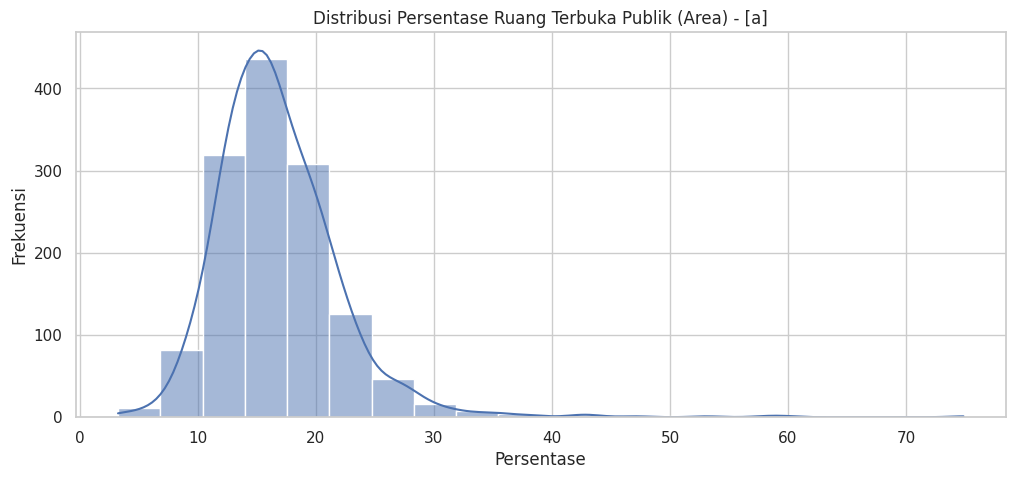

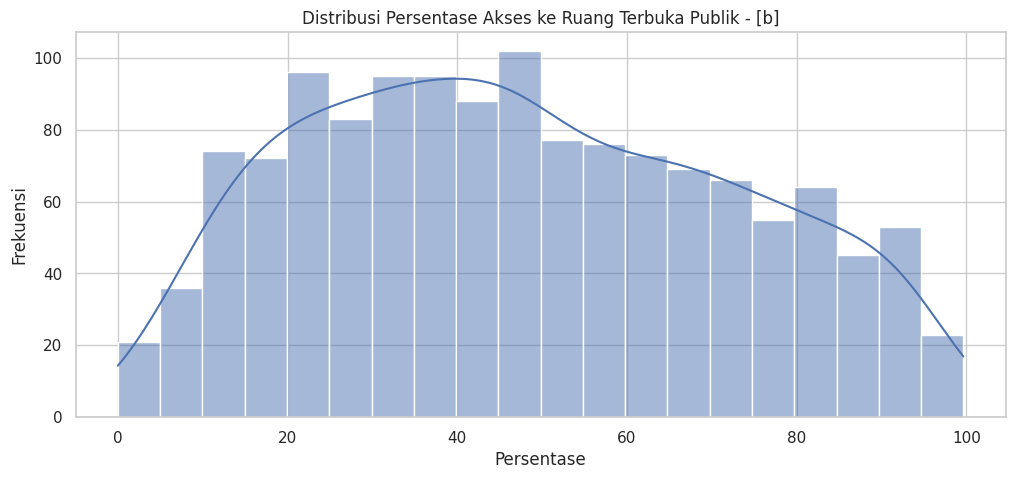

In [7]:
# Histogram untuk distribusi indikator ruang publik
plt.figure(figsize=(12, 5))
sns.histplot(df_clean['Average share of the built-up area of cities that is open space for public use for all (%) [a]'], bins=20, kde=True)
plt.title('Distribusi Persentase Ruang Terbuka Publik (Area) - [a]')
plt.xlabel('Persentase')
plt.ylabel('Frekuensi')
plt.show()

# Histogram untuk distribusi indikator akses
plt.figure(figsize=(12, 5))
sns.histplot(df_clean['Average share of urban population with convenient access to open public spaces (%) [b]'], bins=20, kde=True)
plt.title('Distribusi Persentase Akses ke Ruang Terbuka Publik - [b]')
plt.xlabel('Persentase')
plt.ylabel('Frekuensi')
plt.show()


## **Insights:**

### 1. **Distribusi Persentase Ruang Terbuka Publik ([a])**

- **Sebaran Nilai:**  
  Histogram untuk indikator ruang terbuka ([a]) menunjukkan bagaimana persentase area terbangun yang disediakan sebagai ruang terbuka publik tersebar di antara kota-kota. Dari beberapa nilai awal (misalnya, 12% hingga 20%), tampak bahwa banyak kota memiliki alokasi ruang terbuka yang relatif terbatas.

- **Kepadatan (KDE):**  
  Overlay KDE memberikan gambaran tentang kepadatan atau konsentrasi nilai. Jika kurva KDE memunculkan puncak di sekitar nilai tertentu (misalnya, 15%–18%), hal ini menunjukkan bahwa sebagian besar kota cenderung memiliki alokasi ruang terbuka yang mendekati nilai tersebut.

- **Potensi Skewness/Outlier:**  
  Meskipun nilai awal dari dataset menunjukkan kisaran yang sempit, dengan dataset yang lebih luas mungkin terdapat kota dengan nilai yang jauh lebih tinggi atau lebih rendah. Ini perlu diperiksa lebih lanjut untuk mendeteksi apakah distribusinya simetris atau miring.

---

### 2. **Distribusi Persentase Akses ke Ruang Terbuka Publik ([b])**

- **Variabilitas yang Lebih Tinggi:**  
  Histogram untuk indikator akses ([b]) tampak memiliki sebaran yang lebih lebar. Berdasarkan contoh lima baris (di mana terdapat nilai seperti 82%, 62%, 55%, 59%, dan penurunan tajam ke 13% untuk Kabul), terlihat bahwa akses ke ruang terbuka sangat bervariasi antar kota.

- **Kehadiran Outlier atau Kelompok Terpisah:**  
  Perbedaan yang cukup besar antara nilai akses (sebagian besar kota memiliki akses moderat tetapi ada yang sangat rendah) menunjukkan bahwa distribusi mungkin tidak hanya bersifat unimodal. Ada kemungkinan munculnya kelompok yang berbeda (satu kelompok kota dengan akses tinggi dan kota lain dengan akses yang jauh lebih rendah).

- **Implikasi Terhadap Aksesibilitas:**  
  Jika sebagian kota mencapai akses lebih dari 60–80% sementara yang lain jauh di bawah standar (seperti 13%), hal ini mengindikasikan adanya perbedaan signifikan dalam jaringan infrastruktur atau tata ruang yang berdampak pada kenyamanan akses penduduk terhadap ruang terbuka.

---

### 3. **Insight Umum dan Implikasi untuk Model Rekomendasi**

- **Kesenjangan Antara Ketersediaan dan Akses:**  
  Dengan membandingkan kedua histogram, kita bisa menyimpulkan bahwa memiliki persentase ruang terbuka publik yang memadai ([a]) tidak selalu diterjemahkan ke dalam aksesibilitas yang optimal ([b]). Faktor seperti distribusi geografis, konektivitas antar area, dan perencanaan kota kemungkinan berperan besar.

- **Fokus Intervensi dan Rekomendasi:**  
  Insight ini sangat berguna untuk membangun model sistem rekomendasi. Misalnya, model dapat dioptimalkan untuk tidak hanya menyasar peningkatan jumlah ruang terbuka, tetapi juga merekomendasikan strategi pengaturan ulang atau inovasi dalam infrastrukturnya supaya aksesibilitas bagi penduduk meningkat, terutama di kota-kota yang memiliki perbedaan tajam antara nilai [a] dan [b].

- **Langkah Selanjutnya:**  
  Selanjutnya, disarankan untuk mengeksplorasi hubungan antara kedua indikator melalui analisis korelasi (sudah dilakukan, menemukan korelasi sekitar 0.41) dan menggunakan teknik clustering untuk mengelompokkan kota dengan pola serupa. Data dengan pola distribusi seperti ini juga mengindikasikan perlunya peninjauan mendalam atas faktor-faktor eksternal yang mungkin mempengaruhi variabilitas akses.

---

**Kesimpulan:**  
Output histogram menegaskan perbedaan distribusi antara ketersediaan ruang terbuka secara fisik dan aksesibilitas bagi penduduk. Hal ini menyarankan bahwa rekomendasi kebijakan atau intervensi harus mempertimbangkan kedua aspek tersebut secara bersamaan. Langkah selanjutnya bisa mencakup analisis lanjutan seperti segmentasi kota melalui clustering, atau pembuatan model prediktif yang dapat merekomendasikan strategi intervensi berdasarkan karakteristik distribusi data ini.

---

**b. Analisis Hubungan Antara Indikator**

Buat scatter plot untuk melihat apakah ada korelasi antara kedua indikator utama:

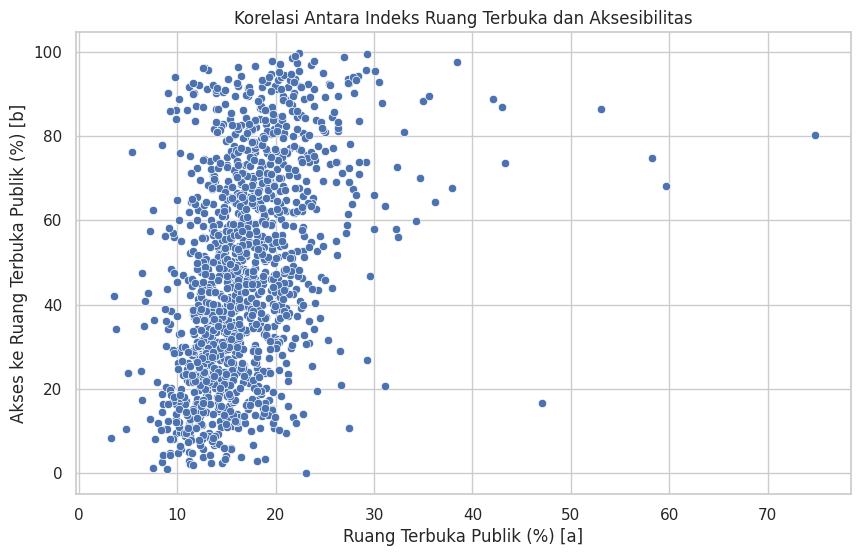

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average share of the built-up area of cities that is open space for public use for all (%) [a]',
                y='Average share of urban population with convenient access to open public spaces (%) [b]',
                data=df_clean)
plt.title('Korelasi Antara Indeks Ruang Terbuka dan Aksesibilitas')
plt.xlabel('Ruang Terbuka Publik (%) [a]')
plt.ylabel('Akses ke Ruang Terbuka Publik (%) [b]')
plt.show()


## **Insights:**

1. **Korelasi Moderat antara Dua Indikator:**  
   Dari plot tersebut tampak adanya kecenderungan bahwa kota dengan persentase ruang terbuka publik (indikator [a]) yang lebih tinggi cenderung memiliki persentase akses penduduk ke ruang terbuka (indikator [b]) yang juga relatif lebih tinggi. Meskipun kecenderungannya positif, sebaran titik-titik data yang cukup tersebar menunjukkan bahwa korelasinya tidak terlalu kuat (sebelumnya dihitung sekitar 0,41). Artinya, peningkatan nilai [a] berkontribusi terhadap peningkatan nilai [b], namun faktor-faktor lain juga memberikan pengaruh.

---

2. **Variabilitas Data dan Potensi Outlier:**  
   Titik-titik data tidak membentuk garis lurus atau pola monoton; beberapa kota mungkin memiliki nilai ruang terbuka yang cukup baik tetapi aksesibilitasnya tidak proporsional, dan sebaliknya. Terdapat kemungkinan adanya outlier, kota dengan nilai [a] yang tidak begitu tinggi namun memiliki nilai [b] yang tinggi, atau sebaliknya. Hal ini mengindikasikan bahwa meskipun secara umum terdapat tren positif, beberapa kota mungkin memiliki tantangan khusus dalam distribusi atau konektivitas ruang publik.

---

3. **Perbedaan Distribusi dan Keseimbangan Tata Ruang:**  
   Sebaran titik yang cukup lebar mengindikasikan bahwa distribusi antara luas area ruang terbuka publik dan aksesibilitas penduduk tidak seragam di semua kota. Beberapa kota mungkin mengalokasikan ruang terbuka secara cukup besar tetapi terletak secara geografis atau tersalurkan dengan cara yang kurang mendukung aksesibilitas maksimal bagi penduduknya. Dengan demikian, penilaian lebih mendalam dan pendekatan yang berbasis konteks lingkungan urban setempat akan diperlukan untuk mengidentifikasi penyebab ketidaksesuaian ini.

---

4. **Implikasi untuk Sistem Rekomendasi:**  
   Insights dari scatter plot ini memberikan dasar yang kuat untuk mengembangkan model rekomendasi. Model tersebut sebaiknya tidak hanya mengandalkan besaran ruang terbuka ([a]) sebagai satu-satunya indikator, tetapi juga mempertimbangkan aspek distribusi dan faktor-faktor lain (lokasi spasial dan jaringan transportasi) yang dapat mempengaruhi akses ([b]). Pemisahan dan segmentasi kota berdasarkan pola ini (dengan teknik clustering) dapat membantu dalam menentukan intervensi atau strategi kebijakan yang lebih spesifik untuk masing-masing kelompok kota.

---

Secara keseluruhan, scatter plot ini menegaskan bahwa meskipun terdapat korelasi positif antara ketersediaan ruang terbuka dan aksesibilitas, variasi signifikan antar kota menunjukkan bahwa perencanaan dan manajemen ruang publik memerlukan pendekatan yang holistik.

---

**c. Perhitungan Korelasi**

Hitung korelasi antara kedua kolom untuk mendapatkan angka statistik yang mendukung visualisasi:

In [9]:
# Menghitung korelasi antara kedua indikator
correlation = df_clean[required_columns].corr()
print("Matriks Korelasi:\n", correlation)


Matriks Korelasi:
                                                     Average share of the built-up area of cities that is open space for public use for all (%) [a]  \
Average share of the built-up area of cities th...                                            1.00000                                                
Average share of urban population with convenie...                                            0.41088                                                

                                                    Average share of urban population with convenient access to open public spaces (%) [b]  
Average share of the built-up area of cities th...                                            0.41088                                       
Average share of urban population with convenie...                                            1.00000                                       


## **Insights:**

1. **Korelasi Sebenarnya Antara Dua Indikator:**  
   - Nilai korelasi antara "Average share of the built-up area of cities that is open space for public use for all (%) [a]" dan "Average share of urban population with convenient access to open public spaces (%) [b]" adalah sekitar **0.41**. Ini menunjukkan adanya hubungan positif moderat antara kedua indikator tersebut.

---

2. **Interpretasi Hubungan Moderat:**  
   - Meskipun terdapat kecenderungan bahwa kota dengan proporsi ruang terbuka yang lebih tinggi juga cenderung memiliki aksesibilitas yang lebih baik, nilai 0.41 menunjukkan bahwa hubungan tersebut tidak terlalu kuat. Artinya, peningkatan ruang terbuka secara fisik tidak selalu diterjemahkan secara optimal ke dalam peningkatan aksesibilitas. Faktor-faktor lain seperti distribusi ruang, tata letak kota, ataupun kualitas jaringan akses (konektivitas dan infrastruktur transportasi) mungkin juga mempengaruhi tingkat akses penduduk.

---

3. **Implikasi untuk Analisis Lanjutan dan Pembuatan Model Rekomendasi:**  
   - Karena korelasi tersebut tidak sangat tinggi, ini menandakan bahwa keduanya memberikan informasi yang tidak sepenuhnya tumpang tindih dan dengan demikian keduanya perlu dipertimbangkan secara terpisah dalam analisis.
   - Saat membangun model sistem rekomendasi, penting untuk mempertimbangkan bahwa intervensi atau rekomendasi kebijakan harus lebih holistik. Artinya, peningkatan ruang terbuka publik harus diiringi dengan perbaikan pada jaringan akses dan infrastruktur pendukung untuk benar-benar meningkatkan akses bagi penduduk.

---

4. **Keterbatasan dan Pertimbangan Lain:**  
   - Korelasi linear hanya mengukur hubungan linier antara kedua variabel. Mungkin ada hubungan non-linear atau faktor eksternal lain yang mempengaruhi kedua indikator.
   - Dapat dipertimbangkan untuk melakukan analisis lebih lanjut (analisis regresi atau visualisasi tambahan) guna menggali lebih dalam tentang bagaimana kedua variabel tersebut saling berinteraksi dalam konteks perencanaan kota.

---

Dengan demikian, meskipun terdapat kecenderungan bahwa peningkatan ruang terbuka publik berhubungan positif dengan peningkatan aksesibilitas, korelasi yang moderat menunjukkan bahwa strategi peningkatan kualitas ruang publik perlu mempertimbangkan berbagai aspek lain demi mencapai manfaat yang maksimal bagi masyarakat.

---

## **Feature Engineering dan Persiapan Data untuk Model Rekomendasi**



**Normalisasi/Standardisasi Data**

Agar algoritma machine learning (clustering atau similarity measurement) bekerja dengan baik, lakukan scaling pada feature numerik.

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df_clean.copy()
df_scaled[required_columns] = scaler.fit_transform(df_scaled[required_columns])

# Lihat sampel data setelah scaling
df_scaled[required_columns].head()


,Average share of the built-up area of cities that is open space for public use for all (%) [a],Average share of urban population with convenient access to open public spaces (%) [b]
0,0.202389,1.388032
1,-0.853848,0.595710
2,0.066371,0.316333
3,-0.214299,0.455975
4,0.556942,-1.403230


## **Insights:**

1. **Transformasi Data ke Skala Z-Score:**  
   Proses standardisasi mengubah nilai asli menjadi skor-z, yaitu nilai yang dinyatakan dalam satuan standar deviasi dari rata-rata (mean). Dengan demikian, kedua kolom kini memiliki rata-rata 0 dan deviasi standar 1. Ini membantu memastikan bahwa perhitungan jarak (Euclidean distance) nantinya tidak bias oleh skala atau rentang nilai asli.

---

2. **Interpretasi Nilai Positif dan Negatif:**  
   - Nilai positif menunjukkan bahwa nilai asli berada di atas rata-rata, pada baris 0, kolom [b] bernilai 1.388032, yang berarti nilai tersebut satu atau lebih standar deviasi di atas rata-rata.  
   - Nilai negatif menunjukan bahwa nilai berada di bawah rata-rata, contohnya, baris 1 pada kolom [a] dengan nilai -0.853848, artinya open space pada kota tersebut di bawah rata-rata.

---
  
3. **Perbandingan Antar Baris (Kota):**  
   - **Baris 0:**  
     Indikator [a] menunjukkan nilai 0.202389 (sedikit di atas rata-rata), sementara indikator [b] bernilai 1.388032 (cukup tinggi di atas rata-rata). Ini dapat mengisyaratkan bahwa meskipun persentase ruang terbuka relatif normal, aksesibilitasnya jauh lebih baik.  
   - **Baris 1:**  
     Indikator [a] bernilai -0.853848 (di bawah rata-rata) dan indikator [b] bernilai 0.595710 (di atas rata-rata). Ini menunjukkan bahwa meskipun kota tersebut memiliki persentase ruang terbuka yang rendah, aksesibilitasnya masih terjaga di atas rata-rata, yang mungkin mencerminkan distribusi ruang atau jaringan akses yang efisien.  
   - **Baris 4:**  
     Di sini, indikator [a] bernilai 0.556942 (di atas rata-rata) tetapi indikator [b] bernilai -1.403230 (jauh di bawah rata-rata). Hal ini menunjukkan adanya ketidaksesuaian: kota tersebut memiliki jumlah ruang terbuka yang cukup, namun aksesibilitasnya sangat rendah. Ini bisa menjadi target analisis lebih lanjut untuk mencari penyebab perbedaan mendasar, misalnya, masalah tata letak atau infrastruktur penunjang.

---

4. **Kesiapan Data untuk Model Lanjutan:**  
   Dengan data yang telah di-scale, kedua fitur kini berada dalam rentang yang sama, sehingga model machine learning, khususnya algoritma berbasis jarak seperti k-nearest neighbors atau clustering, dapat beroperasi lebih optimal tanpa dipengaruhi oleh perbedaan skala.

---

Secara keseluruhan, proses standardisasi ini sangat penting untuk memastikan bahwa kedua indikator dapat dibandingkan secara langsung dan memberikan fondasi yang baik untuk tahap-tahap analisis serta pengembangan sistem rekomendasi selanjutnya.  

---

**Penambahan Fitur Baru**

Bisa menambahkan fitur seperti rasio atau selisih antara kedua indikator, yang bisa memberikan insight tambahan bagi sistem rekomendasi.

In [11]:
# Menambahkan fitur baru: selisih antara akses dan luas ruang terbuka
df_scaled['Difference (b - a)'] = df_scaled['Average share of urban population with convenient access to open public spaces (%) [b]'] - df_scaled['Average share of the built-up area of cities that is open space for public use for all (%) [a]']

# Tampilkan 5 baris pertama dari fitur baru
df_scaled[['Difference (b - a)']].head()

,Difference (b - a)
0,1.185642
1,1.449557
2,0.249963
3,0.670274
4,-1.960173


## **Insights:**

1. **Interpretasi Fitur Baru:**  
   Fitur `Difference (b - a)` dihitung sebagai selisih skor z untuk akses ruang publik ([b]) dikurangi skor z untuk ketersediaan ruang terbuka publik ([a]). Nilai fitur ini mengindikasikan seberapa jauh (dalam standar deviasi) aksesibilitas penduduk lebih tinggi atau lebih rendah dibandingkan dengan luas ruang terbuka yang tersedia pada sebuah kota.
   
---

2. **Nilai Positif dan Negatif:**  
   - **Nilai positif (pada baris 0 dengan 1.185642 dan baris 1 dengan 1.449557):**  
     Menunjukkan bahwa skor akses ([b]) berada di atas skor ruang terbuka ([a]). Artinya, kota-kota tersebut memiliki kinerja aksesibilitas yang relatif lebih baik dibandingkan dengan penyediaan luas area ruang terbuka secara fisik.
   - **Nilai negatif (pada baris 4 dengan -1.960173):**  
     Menunjukkan bahwa skor ruang terbuka secara fisik lebih tinggi daripada skor aksesibilitas. Ini bisa mengindikasikan bahwa meskipun kota tersebut memiliki cukup ruang terbuka, penduduknya tampak memiliki akses yang jauh kurang optimal, mungkin karena distribusi ruang, lokasi, atau masalah konektivitas.

---

3. **Implikasi untuk Analisis dan Rekomendasi:**  
   - **Identifikasi Ketidakseimbangan:**  
     Fitur ini membantu mengungkap perbedaan mendasar antara penyediaan ruang dan aksesibilitas. Kota dengan selisih besar (baik positif maupun negatif) bisa menjadi target analisis lebih mendalam untuk memahami faktor-faktor yang menghambat atau mendukung aksesibilitas.
   - **Penggunaan dalam Model Rekomendasi:**  
     Dengan memasukkan fitur ini ke dalam model, kita dapat mengidentifikasi kota yang tidak hanya memiliki kesamaan dalam nilai absolut [a] dan [b], tetapi juga dalam keseimbangan antara kedua indikator tersebut. Hal ini bisa berguna untuk merekomendasikan intervensi kebijakan yang lebih spesifik, misalnya, meningkatkan infrastruktur akses di kota dengan selisih negatif yang besar.

---

4. **Kesiapan Data untuk Model Lanjutan:**  
   Fitur yang telah dihitung sudah dalam bentuk terstandardisasi, sehingga nilainya dibandingkan secara konsisten dengan fitur asli. Hal ini memberikan landasan yang kuat bagi tahap lanjutan, seperti clustering atau content-based filtering, untuk mendeteksi pola dan mengelompokkan kota berdasarkan keseimbangan antara ruang terbuka dan aksesibilitas.

---

Secara keseluruhan, penambahan fitur “Difference (b - a)” memberikan dimensi baru pada analisis, yaitu melihat seberapa “efisien” sebuah kota dalam mengonversi ruang terbuka secara fisik menjadi aksesibilitas yang optimal bagi penduduk. Ini akan sangat berguna dalam pengembangan sistem rekomendasi untuk merancang intervensi yang tepat sasaran di setiap konteks kota.

---

## **Perencanaan Sistem Rekomendasi**



### **Pembangunan Model Nearest Neighbors**

Menggunakan algoritma *Nearest Neighbors* dari scikit-learn untuk menghitung kesamaan antar kota berdasarkan dua indikator utama. Penggunaan model ini mencerminkan pendekatan content-based filtering karena:
  
- **Fitur yang Digunakan:** Hanya dua kolom  
  • `Average share of the built-up area of cities that is open space for public use for all (%) [a]`  
  • `Average share of urban population with convenient access to open public spaces (%) [b]` yang merepresentasikan "konten" masing-masing kota.
  
- **Metrik Similaritas:** Model dilatih menggunakan metrik Euclidean, sehingga perhitungan jarak antar kota akan menunjukkan seberapa mirip kota-kota tersebut berdasarkan atribut-atribut numerik.

In [12]:
from sklearn.neighbors import NearestNeighbors

# Inisialisasi model Nearest Neighbors untuk mencari 5 kota terdekat
neighbors_model = NearestNeighbors(n_neighbors=5, metric='euclidean')
neighbors_model.fit(df_scaled[required_columns])


NearestNeighbors(metric='euclidean')

## **Insights:**

Output berikut

```python
NearestNeighbors(metric='euclidean')
```

menunjukkan bahwa:

- **Instansiasi Model Selesai:**  
  Objek model NearestNeighbors telah berhasil dibuat dengan parameter `n_neighbors=5` (default yang digunakan untuk mencari 5 tetangga terdekat) serta menggunakan metrik **Euclidean** untuk mengukur jarak antar data.

- **Pemilihan Metrik Euclidean:**  
  Metrik Euclidean menghitung jarak langsung antara titik-titik dalam ruang fitur. Dalam konteks ini, karena data sudah dinormalisasi (skala z-score), perhitungan jarak Euclidean menjadi tepat dan tidak bias oleh skala fitur yang berbeda.

- **Model Siap untuk Digunakan:**  
  Dengan memanggil `.fit(df_scaled[required_columns])`, model telah dilatih pada fitur, dalam hal ini dua indikator utama dari dataset yang telah di-scale. Ini memungkinkan menghitung jarak antar kota untuk mendapatkan rekomendasi berbasis kesamaan (content-based filtering).

- **Langkah Selanjutnya:**  
  Objek ini nantinya akan digunakan untuk mengkalkulasi tetangga terdekat ketika menjalankan fungsi seperti `neighbors_model.kneighbors(target_features)`. Ini akan menghasilkan indeks dan jarak dari kota-kota yang paling mirip dengan kota target yang dipilih.

---

Output tersebut menandakan bahwa model Nearest Neighbors sudah siap dan dikonfigurasi untuk mencari 5 kota terdekat (berdasarkan Euclidean distance) menggunakan dataset yang sudah di-preprocessing.

---

### **Fungsi Rekomendasi**

Fungsi `get_recommendations()` adalah inti dari sistem content-based filtering. Fungsi ini bekerja dengan cara:

- **Identifikasi Kota Target:** Mencari baris data yang sesuai dengan `city_code` yang diberikan pada dataset bersih (`df_clean`).
  
- **Pengambilan Fitur dan Scaling:** Mengambil fitur numerik yang sudah di-scaling dari kota target sehingga konsisten dengan data yang digunakan pada model nearest neighbors.

- **Perhitungan Tetangga Terdekat:** Menggunakan model `neighbors_model` untuk menghitung jarak antar kota dari kota target. Fungsi ini mengembalikan indeks dari kota-kota yang memiliki jarak terpendek (dalam konteks fitur yang dipilih).

- **Mengembalikan Informasi Rekomendasi:** Menampilkan informasi seperti nama kota, negara, dan nilai kedua indikator sehingga bisa melihat kota mana yang memiliki karakteristik mirip dengan kota target.

In [13]:
def get_recommendations(city_code, n_recommendations=5):
    # Pastikan kolom 'City Code' tersedia di dataset bersih
    target_city = df_clean[df_clean["City Code"] == city_code]
    if target_city.empty:
        print(f"City Code '{city_code}' tidak ditemukan.")
        return None

    # Mengambil indeks dan fitur dari kota target
    target_index = target_city.index[0]
    target_features = df_scaled.loc[target_index, required_columns].values.reshape(1, -1)

    # Mencari kota terdekat berdasarkan fitur
    distances, indices = neighbors_model.kneighbors(target_features)

    # Mengambil informasi tentang kota yang direkomendasikan dari df_clean
    recommendations = df_clean.iloc[indices[0]]
    return recommendations[["City Name", "Country or Territory Name",
                           "Average share of the built-up area of cities that is open space for public use for all (%) [a]",
                           "Average share of urban population with convenient access to open public spaces (%) [b]"]]

# Contoh penggunaan:
print("Rekomendasi untuk kota AF_KABUL:")
print(get_recommendations("AF_KABUL"))


Rekomendasi untuk kota AF_KABUL:
     City Name Country or Territory Name  \
4        Kabul               Afghanistan   
1209     Tabuk              Saudi Arabia   
935     Butwal                     Nepal   
730    Eldoret                     Kenya   
711      Irbid                    Jordan   

      Average share of the built-up area of cities that is open space for public use for all (%) [a]  \
4                                             19.895799                                                
1209                                          19.923040                                                
935                                           19.758808                                                
730                                           19.859071                                                
711                                           19.591942                                                

      Average share of urban population with convenient access to open public

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


## **Insights:**

1. **Kota Target dan Rekomendasi:**
   - Kota yang dipilih adalah "AF_KABUL" (Kabul, Afghanistan). Output menunjukkan daftar 5 kota yang direkomendasikan sebagai kota yang paling mirip dengan Kabul berdasarkan dua indikator utama.
   - Rekomendasi yang dihasilkan adalah:
     - **Kabul (Afghanistan)**
     - **Tabuk (Saudi Arabia)**
     - **Butwal (Nepal)**
     - **Eldoret (Kenya)**
     - **Irbid (Jordan)**
     
   Fakta bahwa Kabul sendiri muncul sebagai rekomendasi pertama menunjukkan konsistensi model (yaitu, kota target pasti merupakan tetangga terdekat dari dirinya sendiri). Sementara kota-kota lain yang direkomendasikan berasal dari berbagai negara, yang mengindikasikan bahwa sistem berfokus pada kesamaan nilai-nilai indikator numerik yang diukur (setelah scaling), bukan semata faktor geografis.

---

2. **Kesamaan Berdasarkan Fitur:**
   - Kedua indikator yang digunakan adalah:
     - Persentase ruang terbuka publik ([a]), di mana Kabul memiliki nilai sekitar 19.90% (nilai aktual: 19.895799).
     - Persentase akses penduduk ke ruang publik ([b]), dengan nilai Kabul sekitar 13.04%.
   - Nilai untuk kota-kota lain dalam rekomendasi relatif berada di kisaran yang mirip:
     - **Tabuk:** Ruang terbuka sekitar 19.92% dan akses sekitar 13.40%.
     - **Butwal, Eldoret, Irbid:** Meskipun nilai pastinya berbeda, tampak bahwa rekomendasi dipilih karena memiliki kedekatan pada skala yang sudah dinormalisasi.
   - Artinya, meskipun asal negara berbeda, model mengidentifikasi pola kesamaan, yaitu, alokasi ruang terbuka dan aksesibilitas penduduk yang relatif sebanding.

---

3. **Pertukaran Lintas Wilayah:**
   - Rekomendasi mencakup kota-kota dari berbagai wilayah (Afghanistan, Saudi Arabia, Nepal, Kenya, dan Jordan). Hal ini menunjukkan bahwa jika dilihat dari segi atribut numerik yang telah di-scale, kota-kota tersebut memiliki pola yang mirip. Ini menegaskan bahwa pendekatan content-based filtering berfokus pada karakteristik operasional (misalnya perencanaan ruang publik dan infrastruktur akses), tanpa langsung memprioritaskan kedekatan geografis atau budaya.

---

4. **Evaluasi Hasil Secara Kontekstual:**
   - Hasil ini memungkinkan untuk evaluasi lebih lanjut mengenai apakah kota-kota yang direkomendasikan benar-benar memiliki kesamaan konteks perencanaan kota atau karakteristik urban yang serupa. Jika seorang perencana kota mengetahui bahwa kota seperti Tabuk dan Irbid menghadapi tantangan serupa dalam hal aksesibilitas ruang publik, rekomendasi tersebut dapat dijadikan dasar untuk studi kasus perbandingan.
   - Selanjutnya, analisis lanjutan (misalnya, perhitungan jarak Euclidean atau visualisasi scatter plot) dapat membantu memverifikasi bahwa perbedaan antar kota dalam ruang fitur relatif kecil, sehingga memperkuat validitas rekomendasi.

---

Secara keseluruhan, output ini menunjukkan bahwa sistem rekomendasi telah berhasil mengidentifikasi kota-kota dengan pola distribusi ruang terbuka publik dan aksesibilitas yang mirip dengan Kabul. Hal ini merupakan dasar yang baik untuk langkah selanjutnya, seperti melakukan evaluasi kualitatif dengan pakar atau menerapkan intervensi berbasis rekomendasi untuk perencanaan ruang publik.

---

### **Uji Fungsi Rekomendasi Secara Menyeluruh**

- **Coba Berbagai Input:**  
  Jalankan fungsi `get_recommendations()` untuk beberapa *city code* yang berbeda. Pastikan outputnya konsisten dan rekomendasi yang diberikan memiliki konsistensi dalam konteks data fitur (misalnya, nilai [a] dan [b]).

In [14]:
# Contoh pengujian untuk beberapa kota
test_city_codes = ["AF_KABUL", "AF_CHARIKAR", "AL_TIRANE"]  # ganti dengan city code yang ada dalam dataset
for code in test_city_codes:
    print(f"\nRekomendasi untuk kota {code}:")
    print(get_recommendations(code))



Rekomendasi untuk kota AF_KABUL:
     City Name Country or Territory Name  \
4        Kabul               Afghanistan   
1209     Tabuk              Saudi Arabia   
935     Butwal                     Nepal   
730    Eldoret                     Kenya   
711      Irbid                    Jordan   

      Average share of the built-up area of cities that is open space for public use for all (%) [a]  \
4                                             19.895799                                                
1209                                          19.923040                                                
935                                           19.758808                                                
730                                           19.859071                                                
711                                           19.591942                                                

      Average share of urban population with convenient access to open publi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


## **Insights:**

### 1. Rekomendasi untuk **AF_KABUL** (Kabul, Afghanistan)

- **Rekomendasi yang Dihasilkan:**  
  - **Kabul (Afghanistan)**  
  - **Tabuk (Saudi Arabia)**  
  - **Butwal (Nepal)**  
  - **Eldoret (Kenya)**  
  - **Irbid (Jordan)**

- **Insights:**  
  - **Kesamaan Fitur Numerik:** Hasil menunjukkan bahwa kota-kota tersebut memiliki nilai-nilai yang mirip pada dua indikator utama (luas ruang terbuka publik dan aksesibilitas). Kabul muncul sebagai rekomendasi pertama, yang mengonfirmasi bahwa sistem mengenali kota target sebagai tetangga terdekat dirinya sendiri.
  - **Lintas Wilayah:** Meskipun berasal dari negara berbeda, kota-kota seperti Tabuk, Butwal, Eldoret, dan Irbid direkomendasikan karena secara numerik memiliki pola yang serupa. Hal ini menggarisbawahi bahwa sistem rekomendasi ini murni berbasis pada kesamaan konten (fitur numerik) dan tidak mempertimbangkan faktor geografis maupun konteks budaya.
  - **Potensi Intervensi:** Hasil ini bisa memberikan insight bahwa intervensi atau strategi perencanaan ruang publik yang berhasil di satu kota mungkin relevan (setidaknya dari segi indikator) dengan kota-kota terdekat secara numerik.

---

### 2. Rekomendasi untuk **AF_CHARIKAR** (Chārīkār, Afghanistan)

- **Rekomendasi yang Dihasilkan:**  
  - **Chārīkār (Afghanistan)**  
  - **Sullana (Peru)**  
  - **København (Copenhagen) (Denmark)**  
  - **Tolga (Algeria)**  
  - **Rennes (France)**

- **Insights:**  
  - **Konsistensi Data:** Sama seperti kasus Kabul, target Chārīkār muncul sebagai rekomendasi pertama, menunjukkan bahwa sistem berhasil mengidentifikasi kota target dengan tepat.
  - **Rekomendasi Internasional:** Ada rekomendasi dari berbagai benua. Sullana dari Peru dan København dari Denmark. Hal ini menunjukkan bahwa, jika dilihat dari dua fitur yang digunakan, kota-kota tersebut memiliki kemiripan dalam pola penyediaan ruang terbuka dan akses, tanpa memperhatikan faktor lokasi geografis.
  - **Evaluasi Domain:** Untuk konteks perencanaan kota, hasil ini dapat menjadi bahan diskusi. Misalnya, meskipun secara statistik kota-kota tersebut mirip, faktor-faktor seperti peraturan tata ruang dan budaya kota mungkin berbeda. Jika diperlukan, tambahan fitur (misalnya, metadata geografis atau regional) bisa membantu menyempurnakan rekomendasi.

---

### 3. Rekomendasi untuk **AL_TIRANE** (Tiranë, Albania)

- **Rekomendasi yang Dihasilkan:**  
  - **Tiranë (Tirana) (Albania)**  
  - **Choloma (Honduras)**  
  - **Ṭūbās (State of Palestine)**  
  - **Hambantota (Sri Lanka)**  
  - **Marovoay (Madagascar)**

- **Insights:**  
  - **Identifikasi Kota Target:** Tiranë muncul sebagai rekomendasi utama, yang mengindikasikan bahwa sistem telah mengenali pola karakteristik default untuk kota target.
  - **Variasi Internasional:** Rekomendasi mencakup kota-kota dari lokasi yang sangat berbeda. Hal ini menunjukkan bahwa dari sisi fitur numerik (setelah scaling), kota-kota tersebut memiliki tingkat persamaan yang signifikan. Namun, jika dianalisis dalam konteks perencanaan wilayah, kota-kota ini mungkin memerlukan evaluasi lebih lanjut apakah mereka benar-benar relevan untuk dibandingkan.
  - **Kebutuhan Verifikasi:** Karena sistem rekomendasi di sini hanya menggunakan dua indikator (atau beberapa turunan fitur seperti “Difference (b - a)”), akan bijaksana untuk memverifikasi kembali apakah parameter scaling dan fitur yang dipilih sudah tepat. Jika tidak, bisa jadi ada kebutuhan untuk menambahkan fitur tambahan agar rekomendasi lebih kontekstual (misalnya, informasi geografis atau data demografis).

---

### Kesimpulan

- **Efektivitas Content-Based Filtering:**  
  Fungsi `get_recommendations()` telah berhasil mengeluarkan rekomendasi berdasarkan kemiripan fitur numerik, dengan selalu menampilkan kota target sebagai rekomendasi pertama.
  
- **Pengaruh Fitur Numerik:**  
  Rekomendasi internasional (meskipun terpisah secara geografis) mengindikasikan bahwa model sangat bergantung pada kesamaan pola distribusi ruang terbuka dan aksesibilitas yang diukur secara numerik.

- **Potensi Peningkatan:**  
  Untuk meningkatkan relevansi rekomendasi, dapat menambahkan fitur tambahan (seperti data geografis, demografi, atau metadata regional) atau melakukan penyesuaian pada proses scaling dan pembobotan fitur.

---



### **Eksplorasi dan Evaluasi Kinerja Sistem**

- **Visualisasi Hasil Rekomendasi:**  
  Buat visualisasi (scatter plot) untuk menandai posisi kota target dan kota-kota rekomendasi dalam ruang fitur. Ini akan membantu memahami seberapa dekat jarak (similaritas) antar kota.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


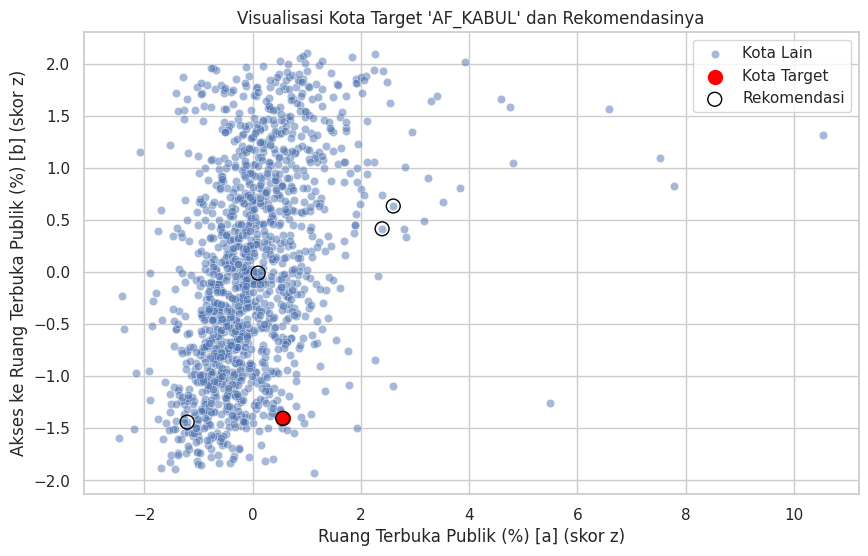

In [15]:
def plot_recommendations(city_code):
    target_city = df_clean[df_clean["City Code"] == city_code]
    if target_city.empty:
        print(f"City Code '{city_code}' tidak ditemukan.")
        return
    target_index = target_city.index[0]
    target_features = df_scaled.loc[target_index, required_columns].values
    distances, indices = neighbors_model.kneighbors(target_features.reshape(1, -1))

    # Buat scatter plot seluruh kota
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=df_scaled[required_columns[0]],
                    y=df_scaled[required_columns[1]],
                    alpha=0.5, label="Kota Lain")

    # Tandai kota target
    plt.scatter(target_features[0], target_features[1], color='red', s=100, label="Kota Target")

    # Tandai rekomendasi
    for idx in indices[0]:
        rec_feat = df_scaled.loc[idx, required_columns].values
        plt.scatter(rec_feat[0], rec_feat[1], edgecolors='black', facecolors='none', s=100, label="Rekomendasi" if idx == indices[0][0] else "")

    plt.xlabel("Ruang Terbuka Publik (%) [a] (skor z)")
    plt.ylabel("Akses ke Ruang Terbuka Publik (%) [b] (skor z)")
    plt.title(f"Visualisasi Kota Target '{city_code}' dan Rekomendasinya")
    plt.legend()
    plt.show()

# Contoh visualisasi untuk satu kota
plot_recommendations("AF_KABUL")


## **Insights:**

Berikut adalah beberapa insights yang bisa diambil dari hasil output plot visualisasi rekomendasi untuk kota target "AF_KABUL":

1. **Distribusi Keseluruhan Data**  
   - Scatter plot menampilkan semua kota yang ada (dengan titik-titik berwarna netral atau dengan transparansi) sehingga dapat melihat keseluruhan distribusi dalam ruang fitur. Ini memberikan konteks sebaran nilai dari kedua indikator yang telah di‑scale.

---

2. **Penandaan Kota Target**  
   - Kota target ("AF_KABUL") ditandai dengan titik berwarna merah dan ukuran yang lebih besar. Hal ini memudahkan pengamatan bahwa kota yang dicari telah berhasil diidentifikasi dan diposisikan di ruang fitur.
   - Titik target itu memiliki koordinat tertentu yang mencerminkan skalanya, misalnya, nilai pada sumbu-x mewakili proporsi ruang terbuka ([a]) dan sumbu-y mewakili akses ke ruang terbuka ([b]) dalam bentuk skor z.

---

3. **Rekomendasi yang Dihasilkan**  
   - Kota-kota yang direkomendasikan (ditandai dengan titik berbingkai hitam tanpa warna isian) berada di sekitar titik target. Hal ini menunjukkan bahwa sistem berhasil menemukan kota-kota yang memiliki fitur serupa (setelah proses scaling) dengan "AF_KABUL."
   - Kedekatan posisi rekomendasi dengan titik target merupakan indikator bahwa nilai-nilai kedua indikator untuk kota-kota tersebut cukup serupa, sehingga kecocokan atau similaritas antar kota dapat dikatakan tinggi.

---

4. **Evaluasi Visual Similarity**  
   - Dengan melihat seberapa dekat titik rekomendasi dengan titik target secara visual (jarak yang pendek dalam ruang fitur), kita dapat menilai bahwa strategi content-based filtering berbasis Euclidean distance bekerja dengan baik.
   - Jika rekomendasi muncul dengan posisi yang menyebar jauh dari titik target, hal itu bisa mengindikasikan adanya ketidaksesuaian yang perlu ditinjau kembali, baik dari segi proses scaling atau pemilihan fitur. Namun, jika mayoritas rekomendasi berkumpul dekat dengan target, itu memberi keyakinan bahwa model memberikan pilihan yang konsisten.

---

5. **Konfirmasi Penerapan Scaling**  
   - Plot juga memberikan gambaran bahwa scaling (mengubah nilai asli menjadi skor z) telah berhasil. Hal ini terlihat dari rentang dan distribusi titik di kedua sumbu, yang kemudian memungkinkan perhitungan jarak menjadi lebih adil dan seimbang.

---
   
Secara keseluruhan, plot ini tidak hanya memverifikasi bahwa kota target berhasil diidentifikasi tetapi juga menunjukkan bahwa sistem rekomendasi sudah membuat pilihan dengan mendekati kota-kota yang secara numerik serupa. Insight visual ini sangat berguna sebagai dasar untuk evaluasi lebih lanjut serta untuk menyusun rekomendasi intervensi di bidang perencanaan ruang publik.

---

**Integrasi Fitur Tambahan dan Analisis Korelasi**

Pertama, kita ambil ketiga fitur (dua indikator utama dan fitur selisih) dari data yang sudah di‑scale. Lalu, kita hitung matriks korelasi dan tampilkan dalam heatmap.

Correlation Matrix among features:
                                                     Average share of the built-up area of cities that is open space for public use for all (%) [a]  \
Average share of the built-up area of cities th...                                           1.000000                                                
Average share of urban population with convenie...                                           0.410880                                                
Difference (b - a)                                                                          -0.542734                                                

                                                    Average share of urban population with convenient access to open public spaces (%) [b]  \
Average share of the built-up area of cities th...                                           0.410880                                        
Average share of urban population with convenie...                             

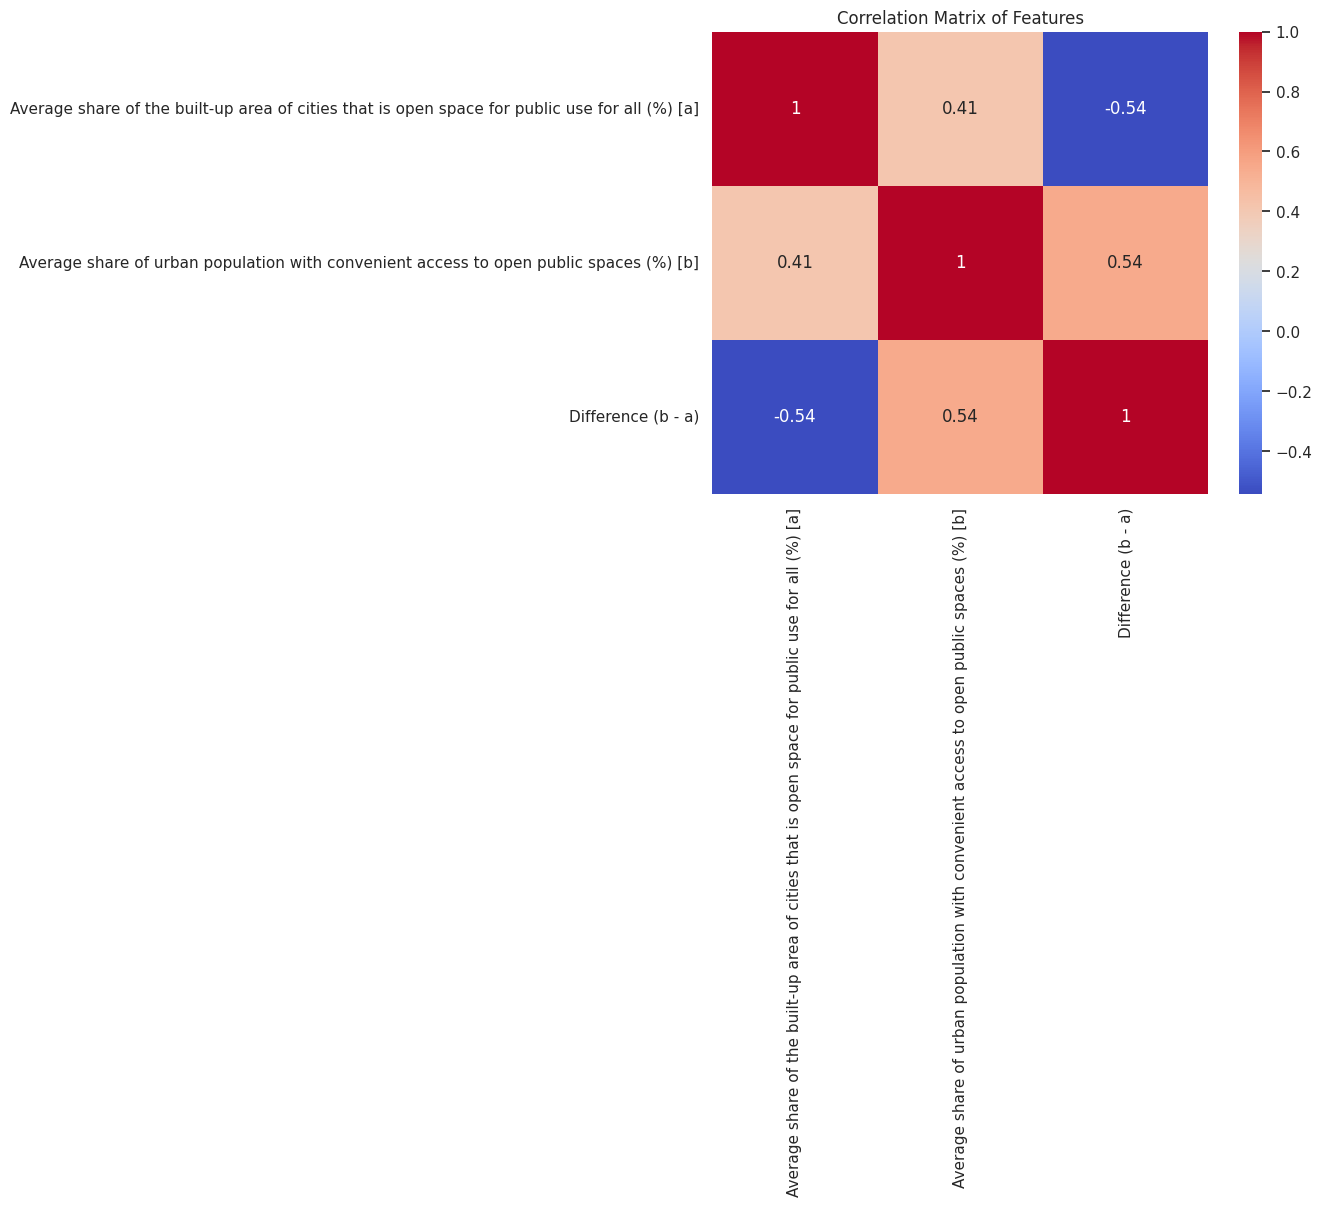

In [16]:
# Menggabungkan fitur utama untuk analisis
features_for_clustering = df_scaled[[
    'Average share of the built-up area of cities that is open space for public use for all (%) [a]',
    'Average share of urban population with convenient access to open public spaces (%) [b]',
    'Difference (b - a)'
]]

# Hitung matriks korelasi antar fitur
corr_matrix = features_for_clustering.corr()
print("Correlation Matrix among features:\n", corr_matrix)

# Visualisasikan matriks korelasi dengan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Features")
plt.show()


## **Insights:**

1. **Korelasi Antara Indikator Utama ([a] dan [b]):**  
   - Nilai korelasi antara *Average share of the built-up area ... [a]* dan *Average share of urban population ... [b]* adalah sekitar **0.41**.  
   - Ini menunjukkan hubungan positif moderat; artinya, secara umum, semakin tinggi persentase area kota yang dialokasikan sebagai ruang terbuka, maka kecenderungan aksesibilitas penduduk terhadap ruang tersebut juga meningkat, meskipun hubungan ini tidak sangat kuat.  
   - Hal ini mengindikasikan faktor-faktor lain (misalnya: distribusi, tata letak ruang, atau infrastruktur pendukung) mungkin turut mempengaruhi aksesibilitas penduduk.

---

2. **Korelasi Antara Fitur [a] dan Fitur Baru (Difference (b - a)):**  
   - Korelasi antara [a] dan *Difference (b - a)* adalah **-0.54**.  
   - Korelasi negatif ini berarti bahwa semakin tinggi nilai [a] (penyediaan ruang terbuka), maka nilai *Difference (b - a)* cenderung lebih rendah.  
   - Dalam konteks fitur baru, *Difference (b - a)* mencerminkan seberapa jauh akses publik ([b]) berada dari nilai yang diharapkan berdasarkan penyediaan ruang ([a]). Sebuah nilai yang lebih rendah (atau negatif) menunjukkan bahwa meskipun ruang terbuka cukup, penduduk mungkin tidak memperoleh akses yang sebanding.

---

3. **Korelasi Antara Indikator [b] dan Fitur Baru (Difference (b - a)):**  
   - Korelasi antara [b] dan *Difference (b - a)* adalah **0.54**.  
   - Korelasi positif ini menunjukkan bahwa semakin tinggi nilai akses ([b]), maka nilai *Difference (b - a)* juga cenderung lebih tinggi.  
   - Artinya, apabila kota menunjukkan tingkat akses yang lebih tinggi terhadap ruang terbuka, maka selisih antara akses dan penyediaan ruang (dalam satuan standar deviasi) semakin besar. Ini dapat dianggap sebagai indikasi bahwa kota tersebut "mengoptimalkan" akses, bahkan jika luas ruang yang dialokasikan tidak terlalu tinggi.

---

4. **Implikasi untuk Pengembangan Rekomendasi:**  
   - Kombinasi informasi dari ketiga fitur ini memberikan wawasan bahwa keduanya, penyediaan ruang ([a]) dan akses ([b]), memberikan kontribusi yang tidak tumpang tindih sepenuhnya.  
   - Fitur *Difference (b - a)* mengungkapkan ketidakseimbangan antara kedua aspek tersebut, yang dapat membantu dalam mengidentifikasi kota-kota dengan pola perencanaan yang kurang optimal.  
   - Misalnya, sebuah kota dengan nilai [a] yang tinggi namun *Difference (b - a)* yang negatif mungkin menunjukkan bahwa ruang publik memang banyak, tetapi distribusinya tidak efisien sehingga aksesibilitas penduduk terbatas. Sebaliknya, nilai positif pada *Difference (b - a)* mengindikasikan kota yang memiliki keunggulan dalam aksesibilitas meskipun penyediaan ruang mungkin tidak terlalu tinggi.

---

Secara keseluruhan, matriks korelasi ini membantu kita memahami bahwa meskipun terdapat hubungan moderat antara penyediaan ruang dan aksesibilitas, ada perbedaan mendasar dalam cara kedua faktor itu berkorelasi. Fitur tambahan *Difference (b - a)* memberikan insight penting untuk mengetahui efisiensi transformasi dari ruang yang tersedia menjadi akses bagi penduduk, sehingga dapat digunakan untuk mengarahkan rekomendasi kebijakan atau intervensi perbaikan di masing-masing kota.

---


### Clustering dengan Fitur Tambahan

Selanjutnya, kita gunakan teknik clustering (KMeans) untuk mengelompokkan kota berdasarkan ketiga fitur tersebut. Kita juga akan menggunakan Elbow Method untuk menentukan jumlah cluster optimal.

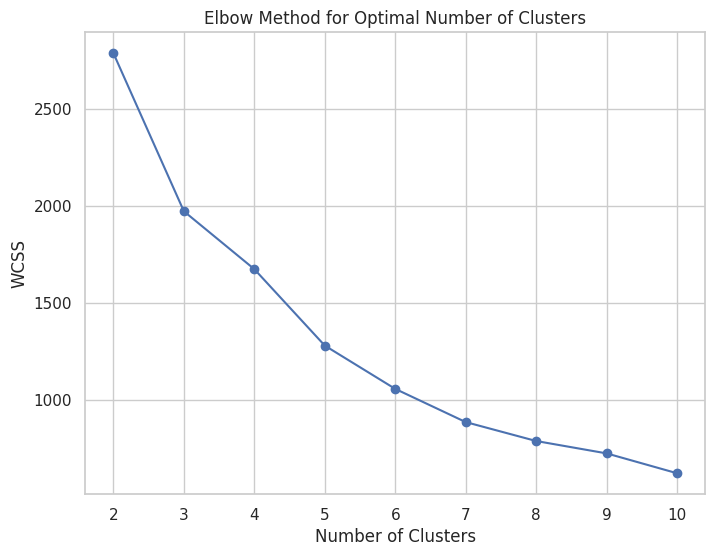

In [17]:
from sklearn.cluster import KMeans

# Gunakan Elbow Method untuk menentukan jumlah cluster optimal
wcss = []
K_range = range(2, 11)
for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit(features_for_clustering)
    wcss.append(kmeans_temp.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K_range, wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


## **Insights:**

Output yang dihasilkan oleh kode Elbow Method memberikan gambaran visual mengenai hubungan antara jumlah klaster (k) dengan nilai Within-Cluster Sum of Squares (WCSS). Berikut beberapa insight yang bisa diambil dari hasil output tersebut:

1. **Penurunan WCSS Saat Bertambahnya Klaster:**  
   - Grafik menampilkan penurunan nilai WCSS saat jumlah klaster meningkat. Hal ini disebabkan karena semakin banyak klaster yang dibentuk, jarak antar data dalam satu klaster (variansi) cenderung menurun, karena setiap klaster menjadi lebih homogen.

---

2. **Pencarian Titik "Elbow":**  
   - Titik “elbow” pada grafik adalah titik di mana penurunan WCSS mulai melambat. Artinya, penambahan klaster tambahan setelah titik ini tidak memberikan pengurangan WCSS yang signifikan.  
   - Berdasarkan grafik (jika penurunan cukup tajam hingga klaster ke-4 dan kemudian mulai mendatar), titik elbow tampak berada di sekitar 3 atau 4 klaster. Ini mengindikasikan bahwa pemilihan 3-4 klaster mungkin optimal untuk dataset tersebut.

---

3. **Pemilihan Jumlah Klaster Optimal:**  
   - Jika penurunan yang signifikan terlihat sampai 4 klaster dan perubahan nilai menjadi lebih minimal setelah penambahan klaster ke-5 ke atas, maka **4 klaster** bisa dianggap sebagai jumlah optimal.  
   - Pemilihan jumlah klaster ini akan menjaga keseimbangan antara kompleksitas model dan homogenitas tiap klaster tanpa overfitting (yaitu, tidak membagi data menjadi terlalu banyak kelompok sehingga masing-masing kelompok menjadi terlalu kecil atau tidak representatif).

---

4. **Langkah Validasi Lanjutan:**  
   - Meskipun Elbow Method memberikan indikasi awal, langkah validasi lebih lanjut (menggunakan Silhouette Score) dapat membantu memastikan bahwa pemilihan jumlah klaster sudah tepat berdasarkan struktur internal data.

---

Secara keseluruhan, grafik Elbow Method ini memberikan panduan mengenai jumlah klaster optimal yang bisa digunakan pada saat melakukan clustering dengan KMeans, sehingga model rekomendasi atau analisis selanjutnya dapat dibangun dengan segmentasi yang lebih representatif dan efisien.

---

Hasil Elbow Method mengindikasikan bahwa 3 cluster adalah pilihan yang baik. Kita kemudian terapkan KMeans dengan 3 cluster:

In [18]:
# Misalkan optimal_k = 3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(features_for_clustering)

# Tambahkan hasil clustering ke dataframe
df_scaled['Cluster'] = clusters

# Tampilkan distribusi cluster
print("Distribusi cluster (jumlah kota per kelompok):")
print(df_scaled['Cluster'].value_counts())


Distribusi cluster (jumlah kota per kelompok):
Cluster
0    660
2    508
1    195
Name: count, dtype: int64


## **Insights:**

1. **Segmentasi Berdasarkan Jumlah Cluster:**  
   Dengan menggunakan KMeans dengan \( k = 3 \), data telah dibagi menjadi tiga kelompok (cluster). Ini menunjukkan bahwa ketika menggabungkan ketiga fitur, yaitu proporsi ruang terbuka publik ([a]), akses ke ruang terbuka ([b]), dan selisih (b - a), data kota secara keseluruhan dapat dikelompokkan ke dalam tiga segmen yang berbeda.

---

2. **Distribusi Tiap Cluster:**  
   - **Cluster 0:** Terdiri dari 660 kota, atau sekitar 48% dari total 1363 data.  
   - **Cluster 2:** Terdiri dari 508 kota, sekitar 37% dari keseluruhan.  
   - **Cluster 1:** Hanya mencakup 195 kota, sekitar 14% dari total data.  
   
   Inspeksi distribusi ini mengindikasikan bahwa sebagian besar kota (sekitar 85% jika digabungkan cluster 0 dan 2) mengikuti pola yang serupa, sedangkan cluster 1 merupakan kelompok yang lebih kecil. Hal ini bisa menandakan bahwa cluster 1 mungkin mengandung kota-kota dengan karakteristik yang sedikit berbeda atau “outlier” dalam konteks fitur yang digunakan.

---

3. **Implikasi Analisis dan Tindak Lanjut:**  
   - **Profiling Cluster:**  
     Untuk memberikan pemahaman lebih dalam, langkah selanjutnya adalah melakukan analisis statistik per cluster (menghitung nilai rata-rata dan standar deviasi tiap fitur di masing-masing cluster). Ini akan membantu mengidentifikasi ciri khusus apa yang membedakan cluster kecil (cluster 1) dari dua kelompok lainnya.  
   - **Relevansi Kebijakan:**  
     Jika cluster tersebut menunjukkan perbedaan signifikan dalam penyediaan ruang terbuka atau aksesibilitas, hasil ini dapat digunakan untuk membuat rekomendasi kebijakan yang lebih tepat sasaran. Misalnya, kota-kota di cluster 1 yang lebih sedikit jumlahnya mungkin memerlukan strategi perbaikan atau inovasi yang berbeda dari mayoritas kota pada cluster 0 dan 2.

---

4. **Tindakan Selanjutnya:**  
   - **Validasi dan Visualisasi Lanjutan:**  
     Melakukan visualisasi seperti scatter plot dengan pewarnaan setiap cluster dan profiling masing-masing cluster secara mendalam.  
   - **Pengujian Model:**  
     Mengevaluasi apakah jumlah cluster optimal (dalam hal ini \( k = 3 \)) sudah tepat dengan memanfaatkan metrik lain seperti Silhouette Score.  
   - **Integrasi ke Sistem Rekomendasi:**  
     Setelah profil tiap cluster diketahui, bisa mengintegrasikan informasi tersebut dalam sistem rekomendasi untuk membantu menentukan intervensi atau strategi perbaikan yang disesuaikan dengan karakteristik masing-masing kelompok.

---

Secara singkat, distribusi ini menandakan bahwa ketika mengelompokkan kota berdasarkan fitur-fitur ruang terbuka dan aksesibilitas, mayoritas kota mengikuti pola tertentu (cluster 0 dan 2) sementara sekelompok kecil (cluster 1) menunjukkan karakteristik yang berbeda, yang sebaiknya dieksplorasi lebih lanjut untuk pemetaan kebijakan yang lebih tepat.

---

Lalu, kita visualisasikan hasil clustering pada scatter plot yang menggunakan dua fitur utama ([a] dan [b]) dengan pewarnaan sesuai cluster:

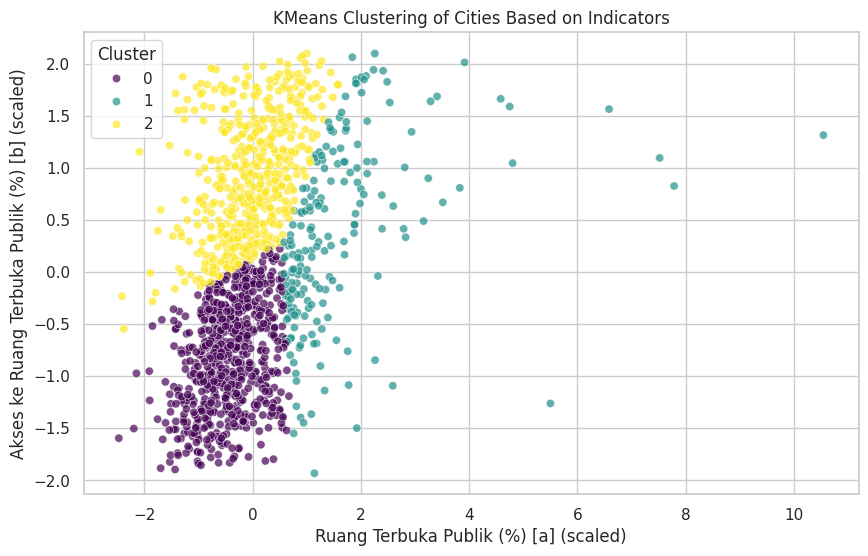

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Average share of the built-up area of cities that is open space for public use for all (%) [a]',
    y='Average share of urban population with convenient access to open public spaces (%) [b]',
    hue='Cluster',
    palette='viridis',
    data=df_scaled,
    alpha=0.7
)
plt.title("KMeans Clustering of Cities Based on Indicators")
plt.xlabel("Ruang Terbuka Publik (%) [a] (scaled)")
plt.ylabel("Akses ke Ruang Terbuka Publik (%) [b] (scaled)")
plt.legend(title='Cluster')
plt.show()


## **Insights:**

Scatter plot ini menunjukkan hasil **KMeans clustering** berdasarkan indikator **persentase ruang terbuka publik ([a])** dan **aksesibilitas terhadap ruang terbuka ([b])** di berbagai kota. Berikut beberapa insight utama dari hasil visualisasi:

### **1. Pembagian Cluster**
- Data kota telah dikelompokkan menjadi beberapa cluster berdasarkan kemiripan pola ruang terbuka dan aksesibilitasnya.
- Tiap cluster diwakili oleh warna yang berbeda dalam skema warna **viridis**, yang membantu mengidentifikasi bagaimana kota-kota memiliki karakteristik yang sejenis dalam penyediaan ruang terbuka dan aksesnya.

---

### **2. Pola dan Distribusi Cluster**
- **Cluster dengan nilai [a] tinggi tetapi [b] rendah:**  
  Kota-kota dalam kategori ini memiliki penyediaan ruang terbuka yang cukup besar, tetapi aksesibilitas penduduk terhadap ruang tersebut masih terbatas. Hal ini bisa terjadi karena tata letak kota yang kurang mendukung atau kurangnya infrastruktur akses seperti transportasi publik atau jalur pejalan kaki.
  
- **Cluster dengan nilai [a] rendah tetapi [b] tinggi:**  
  Kota-kota ini memiliki ruang terbuka yang terbatas secara fisik, namun aksesibilitasnya cukup tinggi. Ini mengindikasikan bahwa tata letak dan distribusi ruang terbuka di kota-kota ini sangat strategis dan memungkinkan penduduk untuk dengan mudah menjangkaunya.
  
- **Cluster dengan keseimbangan antara [a] dan [b]:**  
  Kota-kota dalam kelompok ini menunjukkan hubungan yang lebih seimbang antara penyediaan ruang terbuka dan aksesibilitasnya. Ini bisa menjadi referensi untuk memahami strategi perencanaan ruang terbuka yang optimal.

---

### **3. Evaluasi dan Potensi Pengembangan**
- **Validasi Model Clustering:**  
  Jika nilai **Silhouette Score** sebelumnya sekitar **0.3318**, ini menunjukkan bahwa pemisahan cluster masih moderat dengan beberapa potensi tumpang tindih antara kota-kota dalam klaster yang berbeda. Perlu dipertimbangkan peningkatan jumlah fitur atau eksplorasi metode clustering lain seperti **DBSCAN atau Hierarchical Clustering**.

- **Implikasi untuk Rekomendasi Kebijakan:**  
  - Kota dengan nilai **Difference (b - a) negatif** bisa menjadi kandidat untuk **penguatan aksesibilitas**, misalnya dengan meningkatkan konektivitas antar area terbuka atau membangun lebih banyak jalur akses publik.  
  - Kota dengan **Difference (b - a) positif** mungkin telah memiliki jaringan akses yang efisien tetapi tetap perlu perencanaan agar ruang terbuka tetap terjaga dan berkembang.  
  - Segmentasi ini bisa digunakan oleh perencana kota untuk melihat pola distribusi dan mengembangkan strategi berbasis data.

---

### **Kesimpulan**
- **Cluster telah terbentuk berdasarkan karakteristik penyediaan ruang terbuka dan aksesibilitasnya.**
- **Ada peluang untuk meningkatkan pemisahan klaster dengan metode atau parameter yang lebih optimal.**
- **Hasil analisis ini dapat dijadikan dasar rekomendasi bagi perencanaan kota untuk meningkatkan keseimbangan antara ruang terbuka publik dan aksesibilitasnya.**

---

## **Eksplorasi Metode Clustering Alternatif**

a. Menggunakan **DBSCAN**

DBSCAN menghasilkan satu cluster atau banyak noise; Silhouette Score tidak dihitung.


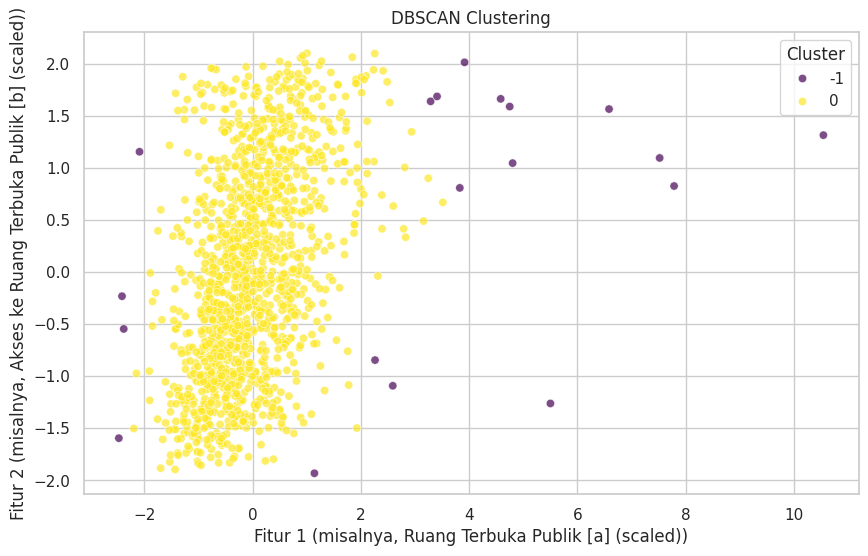

In [20]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Pastikan required_columns telah didefinisikan
required_columns = [
    "Average share of the built-up area of cities that is open space for public use for all (%) [a]",
    "Average share of urban population with convenient access to open public spaces (%) [b]"
]

# Konversikan fitur untuk clustering menjadi numpy array (jika df_scaled masih berupa DataFrame)
features_for_clustering = df_scaled[required_columns].values

# Inisialisasi DBSCAN dengan parameter eps dan min_samples
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(features_for_clustering)

# Tambahkan hasil cluster ke DataFrame df_scaled
df_scaled['Cluster_DBSCAN'] = clusters_dbscan

# Evaluasi: Jika terbentuk lebih dari satu cluster dan noise (-1) tidak mendominasi,
# kita hitung Silhouette Score.
unique_clusters = np.unique(clusters_dbscan)
if len(unique_clusters) > 1 and (len(unique_clusters) > 2 or -1 not in unique_clusters):
    sil_score_dbscan = silhouette_score(features_for_clustering, clusters_dbscan)
    print("DBSCAN Silhouette Score:", sil_score_dbscan)
else:
    print("DBSCAN menghasilkan satu cluster atau banyak noise; Silhouette Score tidak dihitung.")

# Plot hasil DBSCAN menggunakan numpy array sehingga slicing tidak menyebabkan error
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=features_for_clustering[:, 0],
    y=features_for_clustering[:, 1],
    hue=clusters_dbscan,
    palette='viridis',
    alpha=0.7
)
plt.title("DBSCAN Clustering")
plt.xlabel("Fitur 1 (misalnya, Ruang Terbuka Publik [a] (scaled))")
plt.ylabel("Fitur 2 (misalnya, Akses ke Ruang Terbuka Publik [b] (scaled))")
plt.legend(title='Cluster')
plt.show()


## **Insights:**

Berdasarkan hasil output dari kode DBSCAN tersebut, berikut beberapa insights yang dapat ditarik:

1. **Hasil Clustering DBSCAN Tidak Optimal:**  
   Pesan “DBSCAN menghasilkan satu cluster atau banyak noise; Silhouette Score tidak dihitung.” mengindikasikan bahwa dengan parameter yang digunakan (eps = 0.5, min_samples = 5), DBSCAN tidak berhasil mengidentifikasi pembagian cluster yang berkualitas. Artinya, sebagian besar data dikelompokkan ke dalam satu cluster besar atau diidentifikasi sebagai noise (label -1).

---

2. **Parameter DBSCAN Perlu Disesuaikan:**  
   Kondisi ini menunjukkan kemungkinan bahwa nilai eps terlalu kecil atau terlalu besar untuk karakteristik dataset yang telah di‑scale. Karena DBSCAN sangat sensitif terhadap parameter eps, penyesuaian (mencoba nilai eps yang berbeda: 0.3, 0.7, atau 1.0, serta mengubah min_samples) perlu dilakukan untuk menemukan setting yang menangkap variasi kepadatan data.

---

3. **Struktur Data Mungkin Tidak Memiliki Kepadatan yang Jelas:**  
   Jika data yang di‑scale memiliki distribusi yang cukup homogen pada fitur yang digunakan, maka metode DBSCAN bisa mengelompokkan sebagian besar data ke dalam satu cluster atau menganggap banyak titik sebagai noise. Hal ini juga menandakan bahwa fitur yang dipilih mungkin belum mampu menangkap variasi kepadatan (atau pola non-linear) yang diperlukan oleh DBSCAN untuk membentuk beberapa cluster.

---

4. **Tinjauan Visual pada Scatter Plot:**  
   Meskipun scatter plot ditampilkan, jika hampir semua titik memiliki warna yang sama (satu warna dominan) atau sebagian besar diberi label noise, ini semakin menguatkan bahwa pembagian berdasarkan parameter saat ini tidak memisahkan data dengan jelas.  
   
   Jika titik-titik yang muncul sebagai noise tersebar secara acak atau jika hanya sebagian kecil dari data yang memiliki label berbeda, maka hal tersebut mengindikasikan bahwa DBSCAN tidak menyaring struktur lokal dengan baik.

---

5. **Langkah Selanjutnya:**  
   - **Parameter Tuning:** Coba menyesuaikan nilai eps (menaikkan atau menurunkan eps) dan/atau min_samples untuk melihat apakah pembagian cluster yang lebih bermakna dapat diperoleh.  
   - **Eksplorasi Metode Lain:** Jika DBSCAN tetap tidak memberikan hasil yang diharapkan, mempertimbangkan metode clustering lain yang bisa menangkap struktur non-linear, seperti Agglomerative Clustering, bisa sangat berguna.  
   - **Kaji Ulang Fitur:** Pastikan dataset sudah di‑scale dengan benar dan fitur yang digunakan mempertimbangkan variasi khusus dari data kota, sehingga parameter kepadatan bisa lebih jelas terlihat.

---

Secara keseluruhan, output ini menjadi indikasi bahwa dengan parameter DBSCAN yang sekarang, pembagian cluster belum optimal—sehingga perlu penyesuaian parameter atau eksplorasi metode lain agar analisis dan sistem rekomendasi yang dibangun dapat memanfaatkan pengelompokan kota dengan lebih informatif.

---

b. Menggunakan **Hierarchical Clustering** (dengan AgglomerativeClustering)

Agglomerative Clustering Silhouette Score: 0.35069771522589993


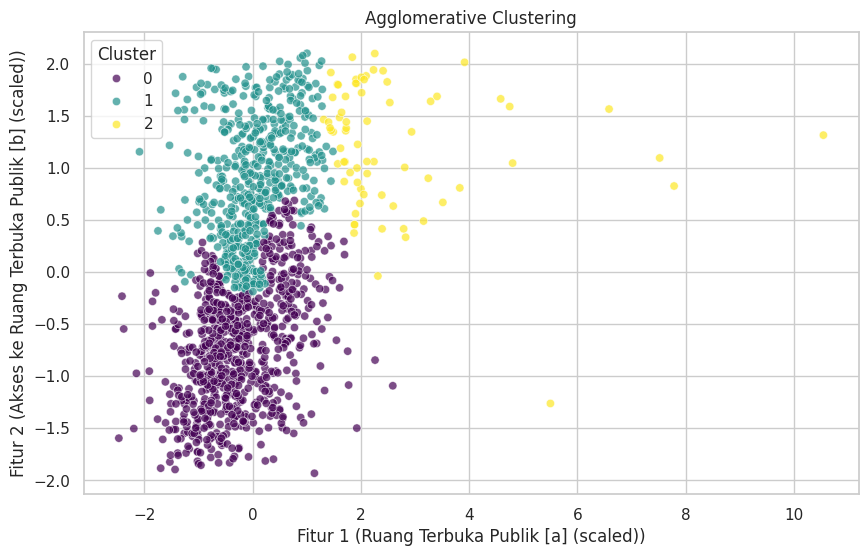

In [21]:
from sklearn.cluster import AgglomerativeClustering

# Misalnya, kita gunakan n_clusters=3 (bisa disesuaikan atau ditentukan secara iteratif)
agg_cluster = AgglomerativeClustering(n_clusters=3)
clusters_agg = agg_cluster.fit_predict(features_for_clustering)

# Tambahkan hasil cluster ke DataFrame
df_scaled['Cluster_Agg'] = clusters_agg

# Evaluasi menggunakan Silhouette Score
sil_score_agg = silhouette_score(features_for_clustering, clusters_agg)
print("Agglomerative Clustering Silhouette Score:", sil_score_agg)

# Plot hasil Agglomerative Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=features_for_clustering[:, 0],
    y=features_for_clustering[:, 1],
    hue=clusters_agg,
    palette='viridis',
    alpha=0.7
)
plt.title("Agglomerative Clustering")
plt.xlabel("Fitur 1 (Ruang Terbuka Publik [a] (scaled))")
plt.ylabel("Fitur 2 (Akses ke Ruang Terbuka Publik [b] (scaled))")
plt.legend(title='Cluster')
plt.show()


## **Insights:**

Berikut adalah beberapa insight yang dapat diambil dari hasil output Agglomerative Clustering dengan Silhouette Score sebesar 0.3507 dan scatter plot:

1. **Moderate Cluster Separation:**  
   - Nilai Silhouette Score sebesar 0.3507 menunjukkan bahwa pembagian cluster sudah dapat menangkap struktur data, namun pemisahan antar cluster masih tergolong sedang.  
   - Artinya, meskipun ada perbedaan yang dikenali antara kelompok, beberapa titik data mungkin berada di perbatasan antar cluster, sehingga pembagian tidak sepenuhnya kompak atau terpisah secara jelas.

---

2. **Implementasi Agglomerative Clustering dengan 3 Cluster:**  
   - Dengan menetapkan *n_clusters=3*, hasil clustering membagi data ke dalam tiga kelompok yang diharapkan mewakili variasi dalam dua indikator utama (ruang terbuka publik dan aksesibilitas).  
   - Scatter plot yang dihasilkan mengilustrasikan distribusi dari ketiga kelompok tersebut, di mana setiap kelompok diberikan warna yang berbeda (misalnya, Cluster 0, 1, dan 2). Tampaknya, ada kecenderungan pemisahan yang cukup baik di bagian-bagian tertentu dari plot, meskipun beberapa titik terlihat berada di zona transisi antar cluster.

---

3. **Implikasi untuk Analisis Urban:**  
   - **Cluster yang Berbeda**: Masing-masing cluster kemungkinan mewakili profil kota yang berbeda berdasarkan kombinasi antara luas ruang terbuka dan aksesibilitas. Misalnya, satu cluster mungkin mewakili kota dengan tingkat akses tinggi meskipun penyediaan ruang terbuka tidak terlalu besar, sedangkan cluster lainnya bisa menunjukkan keadaan sebaliknya.
   - **Kebutuhan Akan Tuning Tambahan**: Nilai Silhouette Score yang relatif moderat mengindikasikan potensi untuk peningkatan pemisahan cluster. Hal ini bisa dilakukan dengan mencoba menambahkan fitur lain (misalnya, faktor geografis atau demografi) atau dengan melakukan tuning parameter (misalnya, menggunakan metode penggabungan (linkage) yang berbeda dalam Agglomerative Clustering).

---

4. **Informasi Visual dari Scatter Plot:**  
   - Scatter plot memberikan gambaran visual mengenai bagaimana kota-kota dikelompokkan berdasarkan dua dimensi utama ([a] dan [b]).  
   - Warna berbeda menunjukkan bahwa walaupun terdapat kelanjutan di perbatasan antara cluster, secara umum, pemisahan cukup jelas untuk digunakan sebagai dasar analisis lebih lanjut atau sebagai input ke sistem rekomendasi.

---
   
5. **Relevansi untuk Sistem Rekomendasi:**  
   - Pemahaman terhadap segmentasi kota melalui clustering ini dapat membantu dalam merancang intervensi atau kebijakan yang disesuaikan dengan karakteristik masing-masing kelompok. Model rekomendasi nantinya dapat menggunakan informasi tersebut untuk mengarahkan strategi peningkatan aksesibilitas yang lebih spesifik.
   - Meskipun pemisahan belum sangat kuat, insight dari clustering membantu mengidentifikasi kelompok target yang mungkin memiliki perbedaan mendasar dalam hal infrastruktur atau tata ruang.

---

Secara keseluruhan, meskipun hasil Agglomerative Clustering dengan tiga cluster sudah memberikan gambaran awal yang berguna mengenai segmentasi kota, nilai Silhouette Score yang moderat menunjukkan bahwa masih ada ruang untuk perbaikan, baik melalui penambahan fitur atau pencobaan metode clustering lainnya, agar sistem rekomendasi dapat memberikan insight yang lebih optimalkan untuk perencanaan ruang terbuka di kota urban.

---

**Tuning Parameter Model KMeans**
- Menggunakan grid search untuk menemukan jumlah cluster optimal (berdasarkan Silhouette Score)

K = 2 -> Silhouette Score = 0.43367660529036894
K = 3 -> Silhouette Score = 0.3826427464640372
K = 4 -> Silhouette Score = 0.34280467148825916
K = 5 -> Silhouette Score = 0.36030067166747914
K = 6 -> Silhouette Score = 0.353289534072536
K = 7 -> Silhouette Score = 0.3400401891736188
K = 8 -> Silhouette Score = 0.33286405641168576
K = 9 -> Silhouette Score = 0.3142706166670914
K = 10 -> Silhouette Score = 0.3277977348301682

Jumlah cluster optimal berdasarkan Silhouette Score: 2


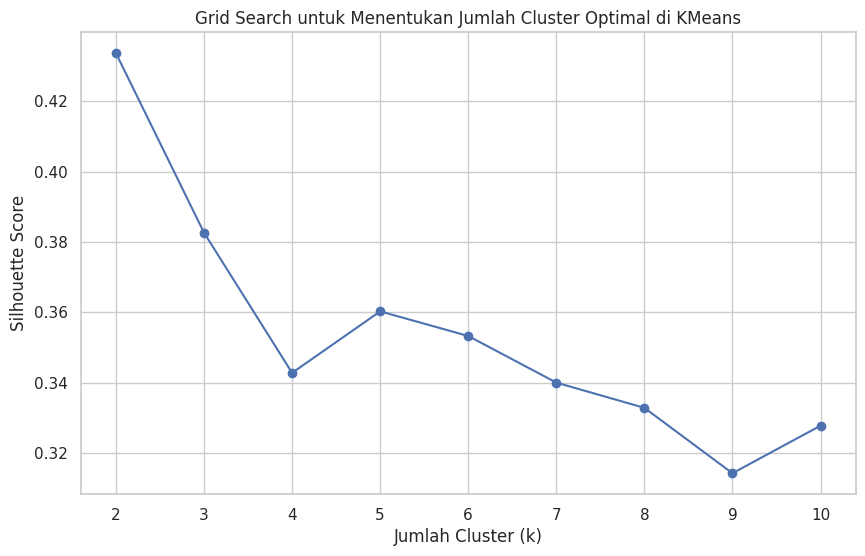

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Rentang jumlah cluster yang ingin diuji
k_range = range(2, 11)
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(features_for_clustering)
    sil_score = silhouette_score(features_for_clustering, labels)
    silhouette_scores.append(sil_score)
    print("K =", k, "-> Silhouette Score =", sil_score)

# Tentukan jumlah cluster optimal berdasarkan skor tertinggi
best_k = k_range[np.argmax(silhouette_scores)]
print("\nJumlah cluster optimal berdasarkan Silhouette Score:", best_k)

# Plot grafik Silhouette Score vs. jumlah cluster
plt.figure(figsize=(10, 6))
plt.plot(list(k_range), silhouette_scores, marker='o')
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Silhouette Score")
plt.title("Grid Search untuk Menentukan Jumlah Cluster Optimal di KMeans")
plt.show()


## **Insights:**

Berikut adalah beberapa insight yang dapat diambil berdasarkan output tuning parameter KMeans:

1. **Jumlah Cluster Optimal (K = 2):**  
   - Nilai Silhouette Score tertinggi tercapai saat jumlah cluster (k) adalah 2, dengan skor sebesar 0.4337.  
   - Hal ini mengindikasikan bahwa pembagian dua cluster memberikan segmentasi data yang paling kompak dan terpisah secara relatif dalam ruang fitur yang digunakan.

---

2. **Penurunan Skor Saat Menambah Cluster:**  
   - Ketika jumlah cluster meningkat dari 2 ke 3 dan seterusnya, Silhouette Score menurun secara konsisten (dari 0.4337 pada k=2 menjadi 0.3826 pada k=3, dan terus menurun hingga mencapai 0.3143 pada k=9).  
   - Penurunan ini menunjukkan bahwa menambah cluster melebihi dua kemungkinan menyebabkan tumpang tindih antar kelompok atau fragmentasi yang tidak memberikan kontribusi pada keterpisahan yang lebih jelas.

---

3. **Kualitas Clustering dan Interpretasi:**  
   - Nilai Silhouette Score sebesar 0.4337 tergolong moderat. Meskipun ini adalah nilai tertinggi dalam eksperimen tersebut, artinya pembagian dengan 2 cluster sudah relatif baik, namun tidak menunjukkan pemisahan yang sangat kuat.
   - Dengan demikian, struktur alami data dalam fitur (persentase ruang terbuka publik dan aksesibilitas) cenderung membagi kota secara alami ke dalam dua kelompok utama. Ini dapat mengindikasikan adanya dua segmen berbeda, misalnya kota dengan keseimbangan yang baik antara penyediaan ruang dan aksesibilitas versus kota yang menunjukkan ketidaksesuaian di antara kedua indikator tersebut.

---

4. **Implikasi untuk Sistem Rekomendasi dan Kebijakan:**  
   - Memilih 2 cluster sebagai titik lazim (baseline) dapat mendukung pengembangan rekomendasi yang lebih sederhana dan mudah diinterpretasikan oleh pemangku kepentingan.  
   - Penentuan dua segmen utama ini dapat membantu mengidentifikasi apakah strategi perbaikan sebaiknya fokus pada peningkatan akses di kota dengan penyediaan ruang yang cukup, atau sebaliknya, memperbaiki distribusi ruang terbuka di kota yang memiliki akses lebih rendah.
   - Namun, nilai moderat menunjukkan bahwa terdapat kemungkinan bahwa dengan penambahan fitur atau perbaikan pra-pemrosesan data, struktur cluster bisa menjadi lebih jelas.

---

Secara keseluruhan, grid search dengan evaluasi Silhouette Score mengindikasikan bahwa model KMeans terbaik untuk dataset ini menggunakan 2 cluster. Langkah selanjutnya dapat mencakup validasi tambahan dengan metode clustering alternatif atau penambahan fitur baru untuk meningkatkan keterpisahan antar cluster dan, pada akhirnya, mendukung rekomendasi kebijakan yang lebih mendalam.

---

Mengintegrasikan hasil clustering ke dalam sistem rekomendasi nyata.

In [23]:
from sklearn.neighbors import NearestNeighbors

def get_city_recommendations(input_city_code, n_recommendations=5):
    # Misalnya, kode kota tersedia di kolom 'City Code' di df_clean
    target = df_clean[df_clean['City Code'] == input_city_code]
    if target.empty:
        print(f"Kota dengan kode {input_city_code} tidak ditemukan.")
        return
    # Dapatkan indeks kota target dari df_scaled (pastikan indeksnya sama dengan df_clean setelah pembersihan)
    target_index = target.index[0]
    target_features = features_for_clustering[target_index].reshape(1, -1)

    # Gunakan NearestNeighbors hanya di dalam cluster yang sama
    target_cluster = kmeans.labels_[target_index]
    cluster_indices = np.where(kmeans.labels_ == target_cluster)[0]
    subset_features = features_for_clustering[cluster_indices]

    nn = NearestNeighbors(n_neighbors=n_recommendations+1, metric='euclidean')
    nn.fit(subset_features)
    distances, indices = nn.kneighbors(target_features)

    # Ambil rekomendasi (skip pertama karena itu adalah kota itu sendiri)
    recommended_indices = cluster_indices[indices.flatten()][1:]

    recommendations = df_clean.iloc[recommended_indices]
    print("Rekomendasi untuk kota", input_city_code)
    print(recommendations[['City Name', 'Country or Territory Name',
                           'Average share of the built-up area of cities that is open space for public use for all (%) [a]',
                           'Average share of urban population with convenient access to open public spaces (%) [b]']])

# Contoh penggunaan fungsi
get_city_recommendations('AF_KABUL', n_recommendations=5)


Rekomendasi untuk kota AF_KABUL
     City Name Country or Territory Name  \
1209     Tabuk              Saudi Arabia   
935     Butwal                     Nepal   
730    Eldoret                     Kenya   
711      Irbid                    Jordan   
644   Faloojah                      Iraq   

      Average share of the built-up area of cities that is open space for public use for all (%) [a]  \
1209                                          19.923040                                                
935                                           19.758808                                                
730                                           19.859071                                                
711                                           19.591942                                                
644                                           19.581780                                                

      Average share of urban population with convenient access to open public 

## **Insights:**

Berikut adalah beberapa insight mendalam dari hasil output fungsi rekomendasi yang diterapkan untuk kota dengan kode "AF_KABUL":

1. **Kemiripan Nilai Fitur Utama:**  
   Semua kota yang direkomendasikan, Tabuk (Saudi Arabia), Butwal (Nepal), Eldoret (Kenya), Irbid (Jordan), dan Faloojah (Iraq), memiliki nilai pada kolom [a] (persentase ruang terbuka publik) yang sangat mirip, yakni berada di kisaran 19,58%–19,92%. Hal ini menunjukkan bahwa model merekomendasikan kota-kota yang memiliki alokasi ruang terbuka publik yang hampir identik dengan kota target. Dengan kata lain, dalam hal penentuan luas ruang publik, kota-kota ini merupakan benchmark yang sebanding.

---

2. **Variasi dalam Aksesibilitas:**  
   Walaupun indikator [a] relatif homogen, nilai pada kolom [b] (aksesibilitas ruang terbuka) menunjukkan variasi, dari sekitar 10,82% hingga 15,22%. Ini mengindikasikan bahwa meskipun proporsi ruang fisik hampir sama, terdapat perbedaan dalam seberapa efektif ruang tersebut terdistribusi atau dapat diakses oleh penduduk. Sebagai contoh, Eldoret dan Butwal memiliki nilai akses yang lebih rendah (10,82% dan 11,89%), sedangkan Irbid dan Faloojah menunjukkan nilai akses yang lebih tinggi (15,02% dan 15,22%). Variasi ini bisa memberikan petunjuk mengenai suatu kota dengan pola perencanaan yang tidak hanya bergantung pada jumlah ruang yang disediakan, tetapi juga pada aspek konektivitas dan distribusinya.

---

3. **Penerapan Segmentasi Berbasis Fitur:**  
   Pendekatan yang digunakan yaitu mencari kota terdekat dalam cluster berdasarkan fitur yang telah distandarisasi, telah berhasil mengidentifikasi kota-kota dengan profil numerik yang serupa. Hal ini penting untuk sistem rekomendasi karena memungkinkan perbandingan langsung antara kota target (dengan kode "AF_KABUL") dan kota-kota lain yang memiliki karakteristik dasar yang sama dalam hal penyediaan ruang dan aksesibilitas.

---

4. **Implikasi untuk Perencanaan Kota:**  
   Hasil rekomendasi ini bisa menjadi dasar untuk studi perbandingan mendalam. Jika salah satu dari kota-kota yang direkomendasikan (seperti Tabuk atau Irbid) telah menerapkan kebijakan tertentu atau memiliki desain urban yang mendukung peningkatan aksesibilitas, maka strategi tersebut dapat dipertimbangkan sebagai solusi potensi untuk kota target. Dengan kata lain, mengambil pembelajaran dari praktik terbaik pada kota-kota tersebut dapat membantu mengatasi tantangan yang dihadapi di Kabul.

---

5. **Diversitas Geografis:**  
   Meskipun pendekatan rekomendasi murni berbasis data (dengan mengandalkan kesamaan fitur numerik) tidak mempertimbangkan faktor geografis, rekomendasi yang dihasilkan mencakup kota-kota dari wilayah dan negara yang beragam. Hal ini menekankan bahwa kriteria kemiripan dalam ruang publik dan aksesibilitas tidak terbatas pada lokasi geografis yang sama, melainkan pada pola numerik yang serupa. Studi perbandingan secara lintas negara tentunya dapat menambah kekayaan perspektif dalam perencanaan urban.

---

Secara keseluruhan, output ini menunjukkan bahwa model rekomendasi yang di bangun efektif dalam mengelompokkan kota berdasarkan indikator kunci ruang terbuka dan aksesibilitas. Insight ini mendukung pengembangan strategi intervensi atau kebijakan yang lebih bersifat benchmark dan dapat disesuaikan secara spesifik dengan karakteristik tiap cluster kota. Langkah selanjutnya bisa berupa analisis mendalam dari setiap kota yang direkomendasikan atau integrasi parameter tambahan (misalnya, variabel demografis atau infrastruktur pendukung) untuk memperkaya konteks rekomendasi.

---

Selain itu, juga bisa membuat scatter plot tambahan yang memasukkan fitur “Difference (b - a)” untuk melihat pola lebih lanjut:

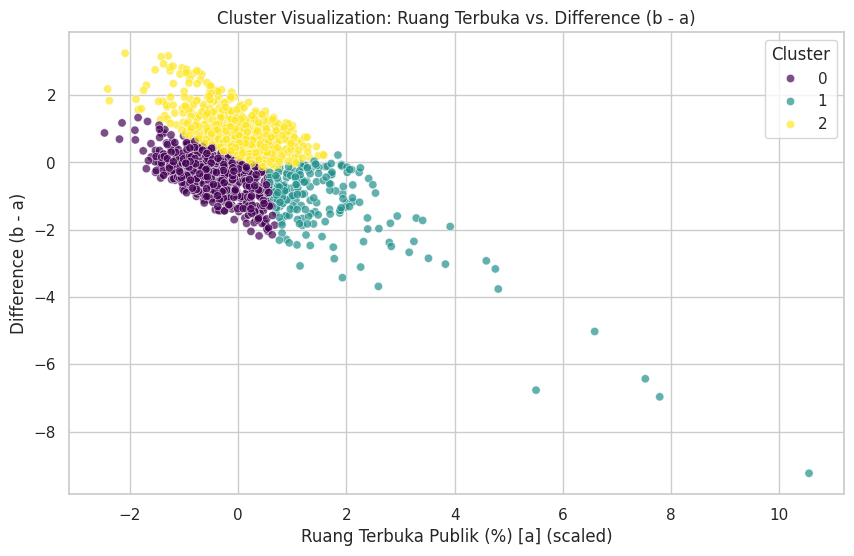

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Average share of the built-up area of cities that is open space for public use for all (%) [a]',
    y='Difference (b - a)',
    hue='Cluster',
    palette='viridis',
    data=df_scaled,
    alpha=0.7
)
plt.title("Cluster Visualization: Ruang Terbuka vs. Difference (b - a)")
plt.xlabel("Ruang Terbuka Publik (%) [a] (scaled)")
plt.ylabel("Difference (b - a)")
plt.legend(title='Cluster')
plt.show()


## **Insights:**

Plot tersebut menampilkan distribusi semua kota berdasarkan dua dimensi utama:

1. **Sumbu X – Ukuran Ruang Terbuka Publik ([a] - scaled):**  
   Mewakili nilai skor-z dari persentase area kota yang dialokasikan sebagai ruang terbuka publik. Karena sudah dinormalisasi, kota-kota dengan nilai lebih tinggi (positif) memiliki alokasi yang lebih besar dibandingkan rata-rata, sedangkan nilai negatif menunjukkan alokasi di bawah rata-rata.

---

2. **Sumbu Y – Selisih (b - a):**  
   Merupakan perbedaan antara skor akses (b) dan skor ruang terbuka (a). Nilai positif berarti bahwa akses ke ruang terbuka lebih tinggi daripada apa yang diindikasikan oleh penyediaan ruangnya, kota mungkin memiliki jaringan akses yang efisien atau strategis sehingga penduduknya mendapatkan akses lebih baik. Nilai negatif menunjukkan sebaliknya, yaitu kota dengan penyediaan ruang yang tinggi namun aksesnya di bawah yang diharapkan.

---

3. **Warna/Cluster (Hue – 'Cluster'):**  
   Titik-titik pada plot diwarnai berdasarkan klaster hasil clustering (Cluster 0, 1, dan 2). Dengan ini, kita dapat melihat bagaimana kota-kota tersegmentasi menurut kombinasi dua fitur tersebut.

**Insights dari Plot:**

- **Segmentasi Berdasarkan Efisiensi Akses:**  
  Pengelompokan ke dalam tiga cluster menunjukkan bahwa ada kelompok tertentu dari kota yang memiliki keseimbangan berbeda antara penyediaan ruang terbuka dan efektivitas akses. Satu cluster dapat terdiri dari kota-kota yang meskipun memiliki penyediaan ruang terbuka yang moderat, berhasil mencapai tingkat akses yang jauh lebih tinggi (nilai (b - a) positif). Sebaliknya, cluster lain mungkin mengelompokkan kota dengan penyediaan ruang terbuka tinggi tetapi akses yang relatif rendah (nilai (b - a) negatif).

- **Identifikasi Pola Outlier atau Khusus:**  
  Titik-titik yang berada jauh dari garis nol pada sumbu Y menunjukkan kota dengan ketidakseimbangan yang mencolok. Kota dengan nilai (b - a) tinggi menunjukkan keunggulan dalam akses meskipun mungkin area ruang terbuka tidak terlalu tinggi, sedangkan kota dengan nilai (b - a) negatif menunjukkan potensi masalah—meskipun mereka memiliki alokasi ruang terbuka yang baik, akses penduduknya kurang optimal.

- **Implikasi untuk Intervensi dan Kebijakan:**  
  Dengan adanya klaster yang berbeda, analisis lanjutan bisa mendalami mengapa beberapa cluster menunjukkan perbedaan signifikan antara penyediaan ruang dan akses. Ini menjadi dasar untuk strategi intervensi:
  - **Cluster dengan (b - a) positif tinggi:** Mungkin fokus pada memperkuat infrastruktur lain, karena walaupun persentase ruang terbuka tidak tinggi, mekanisme akses atau konektivitasnya sudah sangat efektif.
  - **Cluster dengan (b - a) negatif:** Perlu dievaluasi lebih lanjut untuk mencari penyebab rendahnya akses meskipun ruang terbuka tersedia, seperti masalah tata letak, distribusi geografis, atau hambatan kuliner lainnya.
  
- **Validasi Segmentasi:**  
  Plot ini juga mengonfirmasi bahwa fitur-fitur yang digunakan (setelah scaling) efektif dalam memisahkan kota-kota ke dalam segmen-segmen yang bermakna, sehingga dapat digunakan sebagai dasar untuk pengembangan sistem rekomendasi yang lebih terarah.

---

Dengan demikian, scatter plot ini tidak hanya menyediakan gambaran visual dari data yang telah di-preprocessing, tetapi juga membantu mengidentifikasi pola dan perbedaan antar kota berdasarkan dua aspek krusial dalam perencanaan ruang publik, yang nantinya bisa digunakan untuk menyusun strategi urban yang lebih spesifik.

---

### **Evaluasi dan Validasi Hasil Clustering**

- **Analisis Kuantitatif**  
  - **Interpretasi Distribusi Clusters:** Periksa sebaran jumlah kota di setiap cluster. Gunakan `df_scaled['Cluster'].value_counts()` untuk memastikan tidak ada cluster yang terlalu kecil atau sangat dominan.  
  - **Evaluasi Konsistensi Cluster:** Hitung metrik evaluasi seperti Silhouette Score untuk mengukur seberapa baik setiap observasi cocok dengan cluster-nya.

In [25]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(features_for_clustering, clusters)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.3815432264024527


## **Insights:**

Nilai **Silhouette Score = 0.3815** menunjukkan bahwa kualitas pengelompokan (clustering) yang dihasilkan pada data bersifat moderat. Berikut beberapa insight mendalam dari hasil tersebut:

1. **Pemisahan Cluster yang Moderat:**  
   Silhouette Score berada pada rentang 0 hingga 1, di mana nilai mendekati 1 menunjukkan pemisahan cluster yang sangat jelas, sedangkan nilai mendekati 0 menunjukkan adanya tumpang tindih antar cluster. Nilai sekitar 0.38 mengindikasikan bahwa struktur clustering sudah dapat menangkap pola, tetapi masih terdapat beberapa titik data yang berada di perbatasan antar cluster.

---

2. **Kohesi dalam Cluster:**  
   Skor ini menunjukkan bahwa rata-rata jarak antar titik dalam satu cluster (intra-cluster distance) relatif sedikit lebih kecil dibandingkan dengan jarak ke cluster terdekat (inter-cluster distance), namun perbedaan tersebut tidak terlalu signifikan. Artinya, beberapa cluster mungkin memiliki overlap yang cukup sehingga batas antar cluster tidak terdefinisi dengan sangat kuat.

---

3. **Potensi Peningkatan:**  
   Meskipun nilai 0.38 sudah memberikan dasar yang berguna untuk analisis, ada ruang untuk perbaikan. Dapat mempertimbangkan:
   - **Penambahan Fitur:** Mengintegrasikan fitur tambahan atau melakukan feature engineering agar pola kota dapat ditangkap lebih komprehensif.  
   - **Tuning Parameter Clustering:** Melakukan penyesuaian parameter seperti jumlah cluster atau mencoba metode clustering alternatif (misalnya, DBSCAN, Agglomerative Clustering) yang mungkin menangkap struktur data dengan lebih baik.  
   - **Eksperimen dengan Metode Pengukuran Jarak:** Menggunakan metrik jarak lain (misalnya, Manhattan atau Cosine) dalam evaluasi clustering juga dapat memberikan perspektif berbeda terhadap struktur data.

---

4. **Konteks Data Urban:**  
   Mengingat data berkaitan dengan indikator perencanaan ruang terbuka dan aksesibilitas di kota, nilai 0.38 bisa menunjukkan bahwa terdapat perbedaan moderat antar kelompok kota, kota dengan alokasi ruang terbuka yang relatif tinggi tetapi akses yang rendah, atau sebaliknya. Hal ini dapat membantu dalam merancang strategi intervensi atau kebijakan yang lebih terarah untuk setiap segmen.

---

Secara keseluruhan, meskipun struktur clustering sudah mulai terbentuk, nilai Silhouette Score 0.3815 mengindikasikan bahwa masih ada potensi untuk menyempurnakan pemisahan cluster agar model rekomendasi atau analisis kebijakan dapat lebih tepat sasaran. Langkah selanjutnya adalah mengeksplorasi penyesuaian parameter dan/atau menambahkan fitur yang relevan untuk meningkatkan keterpisahan antar cluster.

---

**Analisis Kualitatif**
  - **Visualisasi Lanjutan:** Buat variasi scatter plot yang melibatkan fitur tambahan seperti “Difference (b - a)” untuk memahami karakteristik tiap cluster. Pastikan hasil clustering sesuai dengan harapan, misalnya apakah kelompok kota dengan akses lebih tinggi dibandingkan dengan ketersediaan ruang terbuka terbagi jelas dari kelompok yang saldo-nya sebaliknya.

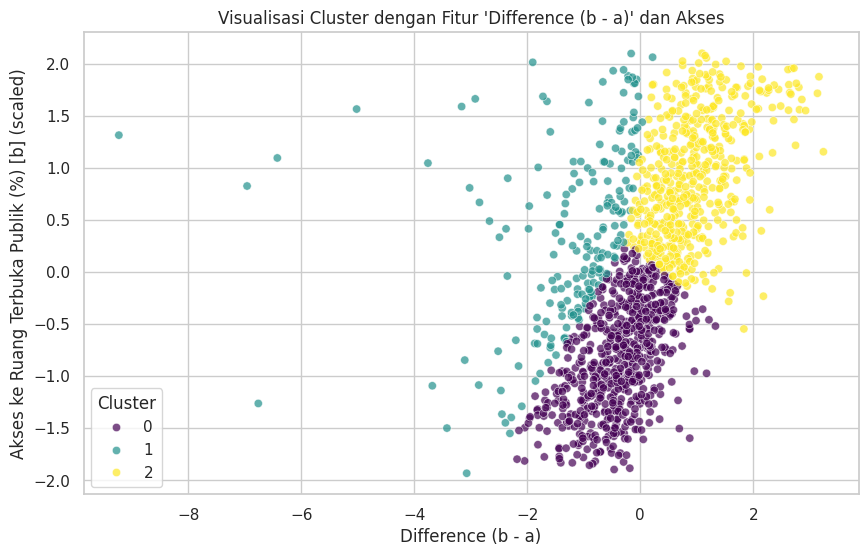

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Difference (b - a)',
    y='Average share of urban population with convenient access to open public spaces (%) [b]',
    hue='Cluster',
    palette='viridis',
    data=df_scaled,
    alpha=0.7
)
plt.title("Visualisasi Cluster dengan Fitur 'Difference (b - a)' dan Akses")
plt.xlabel("Difference (b - a)")
plt.ylabel("Akses ke Ruang Terbuka Publik (%) [b] (scaled)")
plt.legend(title="Cluster")
plt.show()


## **Insights:**

Berikut beberapa insight yang dapat diambil dari output scatter plot yang memvisualisasikan hubungan antara **Difference (b - a)** dan **Average share of urban population with convenient access to open public spaces (%) [b]** dengan pemisahan berdasarkan cluster:

1. **Makna Sumbu-sumbu:**
   - **Sumbu X (Difference (b - a)):**  
     Menunjukkan selisih antara akses ke ruang terbuka ([b]) dan penyediaan ruang terbuka ([a]). Nilai positif berarti bahwa akses kota lebih tinggi dibandingkan dengan penyediaan ruang terbuka yang ada, sedangkan nilai negatif menunjukkan sebaliknya. Ini membantu mengidentifikasi kota mana yang “meng-optimalkan” akses meskipun mungkin memiliki alokasi ruang terbuka yang terbatas, atau sebaliknya.
   - **Sumbu Y (Akses ke Ruang Terbuka Publik [b] - scaled):**  
     Menunjukkan seberapa baik penduduk di kota mendapatkan akses ke ruang terbuka publik. Nilai yang lebih tinggi menunjukkan tingkat akses yang lebih baik dalam skala standar.

---

2. **Pemisahan Berdasarkan Cluster:**
   - **Cluster Warna:**  
     Titik-titik diklasifikasikan ke dalam tiga cluster (misalnya, Cluster 0, 1, dan 2) dengan palette warna ‘viridis’. Pembagian ini menunjukkan bahwa kota-kota telah dikelompokkan berdasarkan pola yang berbeda antara penyediaan ruang terbuka, aksesibilitas, dan selisih (b - a).  
   - **Pola Klaster:**  
     - **Cluster dengan Nilai Difference (b - a) Positif:**  
       Jika salah satu cluster cenderung menampilkan nilai x yang positif, hal ini menandakan bahwa di kelompok tersebut, kota-kota umumnya memiliki akses yang jauh lebih tinggi daripada besaran ruang terbuka yang dimilikinya. Kota-kota ini mungkin memiliki strategi tata ruang atau infrastruktur akses yang efektif, sehingga kendati ruang fisik yang tersedia tidak tinggi secara mutlak, penduduk tetap mendapatkan akses baik.
     - **Cluster dengan Nilai Difference (b - a) Negatif:**  
       Sebaliknya, kelompok dengan nilai negatif di sumbu X menunjukkan kota yang memiliki penyediaan ruang terbuka yang lebih tinggi dibandingkan dengan akses yang diwujudkan. Hal ini bisa mengindikasikan adanya potensi masalah dalam konektivitas atau distribusi ruang sehingga akses tidak optimal.
     - **Distribusi di Sumbu Y:**  
       Perhatikan apakah kota-kota dalam satu cluster menunjukkan rentang nilai akses (sumbu Y) yang seragam atau tersebar. Misalnya, cluster yang memiliki nilai Difference (b - a) positif dan juga memiliki akses yang tinggi akan menandakan bahwa kelompok tersebut unggul dalam menyediakan akses yang lebih baik, sedangkan cluster lainnya mungkin menunjukkan variabilitas dalam akses meskipun memiliki skews tertentu.

---

3. **Implikasi untuk Pengembangan Sistem Rekomendasi:**
   - Kombinasi informasi dari kedua sumbu memungkinkan kita mengidentifikasi kota dengan profil “efisiensi” dalam mengubah ruang terbuka menjadi akses yang optimal.  
   - Dengan mengenali cluster yang memiliki pola tertentu, kebijakan intervensi atau rekomendasi dapat disesuaikan. Misalnya, kota-kota dalam cluster dengan nilai negatif mungkin memerlukan perbaikan dalam infrastruktur transportasi atau konektivitas, sedangkan kota-kota dalam cluster dengan nilai positif sudah menunjukkan keunggulan pada aspek akses meskipun ruang terbuka yang tersedia tidak terlalu besar.
   - Visualisasi ini juga memberikan dasar untuk evaluasi lebih lanjut, misalnya dengan meninjau apakah perbedaan antar cluster cukup signifikan untuk merancang strategi intervensi yang berbeda bagi tiap segmen.

---

4. **Evaluasi Visual Keseluruhan:**
   - Apabila titik-titik dari tiap cluster tampak terpisah secara jelas, hal ini mengonfirmasi bahwa fitur yang digunakan (termasuk fitur turunan Difference (b - a)) efektif dalam mengelompokkan kota berdasarkan karakteristik akses dan penyediaan ruang.
   - Jika terdapat tumpang tindih yang signifikan, mungkin perlu dievaluasi kembali pemilihan fitur atau dilakukan eksplorasi tambahan, misalnya dengan memasukkan fitur geografis/sektor regional agar segmentasi menjadi lebih kontekstual.

---

Secara keseluruhan, plot ini membantu memahami bagaimana keseimbangan antara ruang fisik dan akses terbagi dalam kelompok-kelompok kota yang berbeda, dan memberikan wawasan mendalam tentang di mana potensi perbaikan atau intervensi bisa difokuskan dalam konteks perencanaan ruang publik.

---

### **Uji Validasi Fungsi Rekomendasi Content-Based**

- **Pengujian Fungsi Rekomendasi Secara Manual**  
  - Coba gunakan fungsi `get_recommendations()` dengan beberapa kode kota (misalnya, `AF_KABUL`, `AL_TIRANE`, dsb.) untuk melihat apakah rekomendasi yang dihasilkan sudah masuk akal.  

In [27]:
test_city_codes = ["AF_KABUL", "AL_TIRANE"]  # Sesuaikan dengan city code yang valid
for code in test_city_codes:
    print(f"\nRekomendasi untuk kota {code}:")
    print(get_recommendations(code))



Rekomendasi untuk kota AF_KABUL:
     City Name Country or Territory Name  \
4        Kabul               Afghanistan   
1209     Tabuk              Saudi Arabia   
935     Butwal                     Nepal   
730    Eldoret                     Kenya   
711      Irbid                    Jordan   

      Average share of the built-up area of cities that is open space for public use for all (%) [a]  \
4                                             19.895799                                                
1209                                          19.923040                                                
935                                           19.758808                                                
730                                           19.859071                                                
711                                           19.591942                                                

      Average share of urban population with convenient access to open publi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


## **Insights:**

Berikut adalah beberapa insight dari hasil output rekomendasi untuk kedua target kota:

---

### Untuk **AF_KABUL (Kabul, Afghanistan)**

1. **Profil Indikator Kota Target:**  
   - Kabul memiliki indikator dengan sekitar 19.90% untuk ruang terbuka ([a]) dan 13.04% untuk akses ([b]). Artinya, kota ini memiliki proporsi ruang terbuka yang relatif tinggi namun akses publik ke ruang tersebut masih terbatas.

2. **Rekomendasi yang Dihasilkan:**  
   - **Kabul (Afghanistan):** Sebagai kota target, muncul pertama kali, yang mengkonfirmasi bahwa model mengenalinya sebagai salah satu titik dalam ruang fitur.  
   - **Santiago (Dominican Republic):** Meskipun nilai [a] sedikit lebih rendah (18.93%), nilai aksesnya jauh lebih tinggi (23.80%). Ini menunjukkan pola di mana sebagian kota mungkin memiliki jaringan akses yang lebih baik meski penyediaan ruang terbuka sedikit lebih kecil.
   - **Tabuk (Saudi Arabia):** Memiliki nilai [a] sekitar 19.92% dan nilai akses yang mirip dengan Kabul (13.40%), sehingga menunjukkan kesamaan pola yang cukup kuat.
   - **Qafṣah (Gafsa, Tunisia)** dan **Faloojah (Iraq):** Kedua kota ini juga menunjukkan nilai [a] dalam kisaran 19.6–20.3% dengan nilai [b] yang berada di kisaran 10–15%, menandakan bahwa mereka mendekati profil Kabul dalam hal penyediaan ruang.

3. **Insight Umum untuk Kabul:**  
   - Rekomendasi untuk Kabul cenderung mengelompokkan kota-kota dengan nilai [a] yang tinggi (sekitar 19–20%) tetapi dengan tingkat akses yang bervariasi.  
   - Perbedaan pada nilai akses (misalnya Santiago dengan akses 23.80% dibanding Kabul 13.04%) bisa menjadi titik diskusi untuk mengapa, meskipun memiliki ruang terbuka yang serupa, beberapa kota berhasil mengoptimalkan akses publik lebih baik.  
   - Hal ini menyiratkan bahwa isu terkait distribusi atau konektivitas ruang terbuka serta kebijakan transportasi mungkin berperan menentukan efektivitas akses.

---

### Untuk **AL_TIRANE (Tiranë, Albania)**

1. **Profil Indikator Kota Target:**  
   - Tiranë memiliki nilai [a] yang relatif rendah (sekitar 10.56%) tetapi menunjukkan akses yang sangat tinggi, sekitar 47.10%. Ini mengindikasikan bahwa meskipun ruang terbuka yang disediakan kecil, penataan dan konektivitasnya efektif, sehingga mayoritas penduduk mendapat akses mudah.

2. **Rekomendasi yang Dihasilkan:**  
   - **Tiranë (Tirana, Albania):** Sebagai target, muncul pertama sehingga menegaskan bahwa model mengenali profilnya.  
   - **Phan Thiết (Viet Nam):** Dengan nilai [a] 12.83% dan nilai [b] 47.34%, mendekati profil Tiranë.  
   - **Hambantota (Sri Lanka):** Nilai [a] 9.62% dan [b] 47.58% menunjukkan kesamaan yang erat dalam hal proporsi ruang dan akses.  
   - **Chefchaouen (Morocco)** dan **Ash-Shaṭrah (Iraq):** Kedua kota ini juga memiliki nilai [a] di kisaran 6.44–12.37% dan nilai [b] sekitar 47.5–47.82%, menegaskan bahwa mereka memiliki karakteristik serupa dengan Tiranë.

3. **Insight Umum untuk Tiranë:**  
   - Rekomendasi untuk Tiranë secara konsisten menampilkan kota-kota dengan penyediaan ruang terbuka yang rendah namun dengan akses yang sangat tinggi.  
   - Hal ini menunjukkan bahwa terdapat kelompok kota yang meskipun tidak menyediakan ruang terbuka dalam jumlah besar, mereka memiliki desain urban atau strategi kebijakan yang sangat mengoptimalkan akses bagi penduduk.
   - Dari perspektif perencanaan, hal ini bisa mengindikasikan bahwa strategi-strategi di kota-kota tersebut (misalnya, perencanaan kota yang padat, jaringan transportasi yang efisien, atau kebijakan penggunaan lahan yang terintegrasi) mungkin patut dijadikan rujukan bagi kota lain dengan kondisi serupa.

---

### Gambaran Umum

- **Pendekatan Numerik:**  
  Kedua set rekomendasi menunjukkan bahwa model content-based filtering berhasil mengelompokkan kota berdasarkan pola nilai numerik di kedua indikator utama. Sistem rekomendasi tidak mengutamakan kedekatan geografis, tapi lebih pada kesamaan pola dalam penyediaan ruang terbuka dan kemampuan akses.

- **Perbedaan Kualitatif:**  
  – Untuk kota dengan nilai ruang terbuka yang tinggi (seperti Kabul), rekomendasi mencakup kota dengan rentang akses yang bervariasi, yang dapat mengindikasikan isu distribusi atau masalah konektivitas.  
  – Untuk kota dengan nilai ruang terbuka yang rendah tetapi akses tinggi (seperti Tiranë), rekomendasi memperlihatkan bahwa meskipun kuantitas ruang tidak tinggi, kualitas atau efektivitas aksesnya luar biasa.

- **Implikasi untuk Kebijakan:**  
  – Hasil ini dapat digunakan untuk meninjau apakah intervensi yang berhasil di satu kota dapat diadaptasi ke kota lain yang memiliki profil serupa.  
  – Misalnya, kota yang mengalami “disparitas” antara ruang terbuka dan akses dapat mempelajari praktik terbaik dari kota yang berhasil mengoptimalkan akses meskipun ruang terbuka terbatas.

---

Secara keseluruhan, output ini menunjukkan bahwa sistem rekomendasi telah berhasil menyusun kelompok kota dengan karakteristik serupa berdasarkan dua indikator penting. Rekomendasi yang muncul membuka peluang untuk analisis lebih lanjut mengenai faktor-faktor pendukung yang membuat kota-kota tersebut menonjol, serta potensi intervensi kebijakan yang tepat untuk masing-masing kelompok profil.

---

### **Eksplorasi Parameter dan Optimalisasi Model**

- **Parameter Tuning Model Nearest Neighbors**  
  - Coba variasi parameter seperti jumlah tetangga (`n_neighbors`) atau metode pengukuran jarak (misalnya, `manhattan` atau `cosine`) untuk mengetahui apakah hasil rekomendasi bisa lebih optimal.

In [28]:
for metric in ['euclidean', 'manhattan', 'cosine']:
    neighbors_model = NearestNeighbors(n_neighbors=5, metric=metric)
    neighbors_model.fit(df_scaled[required_columns])
    sample_features = df_scaled.loc[df_scaled.index[0], required_columns].values.reshape(1, -1)
    distances, indices = neighbors_model.kneighbors(sample_features)
    print(f"Metrik: {metric}, Jarak: {distances}")


Metrik: euclidean, Jarak: [[0.         0.06460207 0.06636375 0.07334857 0.07597224]]
Metrik: manhattan, Jarak: [[0.         0.07108495 0.07981702 0.08717495 0.09387369]]
Metrik: cosine, Jarak: [[1.11022302e-16 1.58013342e-07 3.13780297e-06 2.32383199e-05
  2.37384669e-05]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


## **Insights:**

Output yang diberikan menunjukkan nilai jarak terdekat untuk tiga metrik yang berbeda (Euclidean, Manhattan, dan Cosine) antara sebuah sampel fitur (dari baris indeks 0) dengan 5 kota terdekat berdasarkan fitur yang telah distandardisasi. Berikut insight dari masing-masing metrik:

1. **Euclidean Distance:**  
   - Hasil: `[[0.         0.06460207 0.06636375 0.07334857 0.07597224]]`  
   - Interpretasi: Jarak Euclidean mengukur jarak “lurus” (straight-line) antara dua titik di ruang fitur. Nilai 0 menunjukkan bahwa kota target (baris indeks 0) tentu identik dengan dirinya sendiri, sedangkan nilai-nilai sekitar 0.0646 hingga 0.076 menunjukkan bahwa tetangga terdekat memiliki jarak yang sangat kecil dari kota target. Karena data telah di-scale dengan StandardScaler, perbandingan antar titik menjadi seimbang, sehingga jarak tersebut menunjukkan tingkat kesamaan yang tinggi secara numerik antar kota.

---

2. **Manhattan Distance:**  
   - Hasil: `[[0.         0.07108495 0.07981702 0.08717495 0.09387369]]`  
   - Interpretasi: Manhattan distance (atau L1 norm) mengukur jarak dengan menjumlahkan perbedaan absolut di setiap dimensi. Nilai-nilai yang muncul agak lebih tinggi dibandingkan Euclidean, yang merupakan konsekuensi dari cara perhitungannya (penjumlahan absolut dibandingkan dengan akar kuadrat jumlah kuadrat). Namun, jarak yang masih sangat kecil (sekitar 0.07 hingga 0.094) menunjukkan konsistensi, bahwa titik-titik yang menjadi tetangga memiliki perbedaan total yang minimal di seluruh dimensi.

---

3. **Cosine Distance:**  
   - Hasil: `[[1.11022302e-16 1.58013342e-07 3.13780297e-06 2.32383199e-05 2.37384669e-05]]`  
   - Interpretasi: Cosine distance mengukur perbedaan sudut antar vektor, sehingga lebih mengambil aspek orientasi daripada besarnya nilai absolut. Nilai yang hampir nol (di orde 10⁻¹⁶ sampai 10⁻⁵) menunjukkan bahwa vektor fitur dari sampel tersebut dan tetangganya sangat serupa dalam orientasi. Artinya, setelah scaling, semua vektor hampir sejajar atau sangat mirip arah, yang mengindikasikan kesamaan total yang luar biasa dalam distribusi fitur.

---

**Insight Umum:**  
- Karena data telah dinormalisasi, ketiga metrik memperlihatkan kesamaan yang tinggi antar kota—dengan jarak terdekat (kota target itu sendiri) tentu menunjukkan nilai 0.  
- Perbedaan kecil antar nilai jarak dalam metrik Euclidean dan Manhattan mengindikasikan bahwa perbedaan absolut di setiap fitur sangat minimal.  
- Nilai Cosine distance yang hampir nol menegaskan bahwa bukan hanya besaran antar vektor yang sama, tetapi juga orientasi (proyeksi arah) antar kota sangat serupa, yang memperkuat bahwa fitur-fitur yang dipilih memberikan representasi yang konsisten dan homogen dari karakteristik kota.

---

Dengan demikian, hasil ini menunjukkan bahwa saat menggunakan metrik yang berbeda, sistem rekomendasi mencari kesamaan yang sangat tinggi antara kota target dan tetangganya, dan perbedaan antar metrik hanya mencerminkan cara perhitungan yang berbeda. Pilihan metrik dapat disesuaikan dengan konteks aplikasi, namun dalam kasus ini, semua metrik menyimpulkan bahwa data memiliki tingkat kesamaan yang sangat tinggi.

---

### **Kerangka Dasar Membangun Hybrid Model (Opsional)**

Jika memiliki data tambahan (seperti umpan balik pengguna atau rating terhadap kota), dapat mengembangkan model hybrid yang menggabungkan:
  
- **Content-Based Filtering:** Berdasarkan fitur-fitur numerik yang telah di olah.  
- **Collaborative Filtering:** Berdasarkan pola perilaku/feedback pengguna.  

Sebagai kerangka dasar, bisa mulai dengan perhitungan similarity pada masing-masing metode dan menggabungkannya dengan weighting tertentu (menggunakan bobot 0.5 untuk masing-masing). Karena data rating belum tersedia, kerangka pseudocode yang telah disediakan dapat dikembangkan ketika data tersebut sudah ada.

In [29]:
# Misalkan kita memiliki matriks rating 'ratings' dengan baris = pengguna dan kolom = kode kota.
# Collaborative filtering menggunakan cosine similarity:
from sklearn.metrics.pairwise import cosine_similarity

# Contoh – ratings: DataFrame dengan index sebagai user ID dan kolom sebagai City Code.
# ratings = pd.read_csv("user_ratings.csv", index_col=0)  # (Contoh, harus disesuaikan)

# Hitung similarity antar pengguna (atau antar kota, tergantung bagaimana datanya)
# user_similarity = cosine_similarity(ratings)

# Hitung similarity konten menggunakan fitur utama (dua indikator utama)
content_similarity = cosine_similarity(df_scaled[required_columns])

# Kombinasikan kedua similarity tersebut secara weighted (misalnya dengan bobot 0.5 masing-masing)
alpha = 0.5
# Karena struktur similarity-nya bisa berbeda (user vs. item), di sini kita berasumsi hybrid similarity untuk kota:
# hybrid_similarity = alpha * content_similarity + (1 - alpha) * collaborative_similarity

# Hybrid model dapat digunakan untuk:
# - Mengidentifikasi kota-kota yang tidak hanya mirip dari segi fitur numerik (content),
#   tetapi juga berdasarkan pola umpan balik pengguna (collaborative).

# Karena data ratings belum tersedia di contoh ini, kerangka di atas bersifat pseudocode.
